# CRIME RATES IN LONDON

In [1]:
import pandas as pd 
import csv
import seaborn as sns
import numpy as np
import ast
from collections import defaultdict
%matplotlib notebook
import matplotlib.pyplot as plt #2D plotting library
plt.style.use('ggplot')#Plotting system to make plots look professional.Shows the graphs in line
import plotly.plotly as py
import plotly.graph_objs as go
import plotly as py  #Data analysis and graphing tool
from plotly.offline import init_notebook_mode, iplot #Plotly can work online or offline on jupyter notebook
init_notebook_mode(connected=True) #Initiate Plotly to plot graphs offline
from matplotlib.ticker import EngFormatter
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [2]:
filename = "crime_rates.csv"

#Load dataset
#By opening the csv file in this format using pandas all the empty values become NaN.
df = pd.read_csv(filename, usecols=[1,2,3,4,5], header=0, index_col=None) 
#The first and the last two columns have been elimiated
df

Borough     Year                   Offences   Rate  \
0       Barking and Dagenham  1999-00      All recorded offences  120.5   
1                     Barnet  1999-00      All recorded offences   98.0   
2                     Bexley  1999-00      All recorded offences   95.1   
3                      Brent  1999-00      All recorded offences  127.7   
4                    Bromley  1999-00      All recorded offences   89.8   
5                     Camden  1999-00      All recorded offences  241.0   
6                    Croydon  1999-00      All recorded offences  113.7   
7                     Ealing  1999-00      All recorded offences  128.2   
8                    Enfield  1999-00      All recorded offences  104.8   
9                  Greenwich  1999-00      All recorded offences  141.4   
10                   Hackney  1999-00      All recorded offences  195.9   
11    Hammersmith and Fulham  1999-00      All recorded offences  178.0   
12                  Haringey  1999-00      All recorded offences  155.9   
13                    Harrow  1999-00      All recorded offences   80.7   
14                  Havering  1999-00      All recorded offences   83.2   
15                Hillingdon  1999-00      All recorded offences  107.2   
16                  Hounslow  1999-00      All recorded offences  144.8   
17                 Islington  1999-00      All recorded offences  218.7   
18    Kensington and Chelsea  1999-00      All recorded offences  208.4   
19      Kingston upon Thames  1999-00      All recorded offences  100.3   
20                   Lambeth  1999-00      All recorded offences  195.7   
21                  Lewisham  1999-00      All recorded offences  118.4   
22                    Merton  1999-00      All recorded offences   90.8   
23                    Newham  1999-00      All recorded offences  159.4   
24                 Redbridge  1999-00      All recorded offences  103.2   
25      Richmond upon Thames  1999-00      All recorded offences   89.7   
26                 Southwark  1999-00      All recorded offences  176.5   
27                    Sutton  1999-00      All recorded offences   80.8   
28             Tower Hamlets  1999-00      All recorded offences  176.1   
29            Waltham Forest  1999-00      All recorded offences  122.3   
...                      ...      ...                        ...    ...   
6630                  Ealing  2016-17  Other Notifiable Offences    1.5   
6631                 Enfield  2016-17  Other Notifiable Offences    1.4   
6632               Greenwich  2016-17  Other Notifiable Offences    1.6   
6633                 Hackney  2016-17  Other Notifiable Offences    1.6   
6634  Hammersmith and Fulham  2016-17  Other Notifiable Offences    2.3   
6635                Haringey  2016-17  Other Notifiable Offences    1.6   
6636                  Harrow  2016-17  Other Notifiable Offences    0.9   
6637                Havering  2016-17  Other Notifiable Offences    1.2   
6638              Hillingdon  2016-17  Other Notifiable Offences    1.3   
6639                Hounslow  2016-17  Other Notifiable Offences    1.6   
6640               Islington  2016-17  Other Notifiable Offences    1.9   
6641  Kensington and Chelsea  2016-17  Other Notifiable Offences    1.9   
6642    Kingston upon Thames  2016-17  Other Notifiable Offences    0.8   
6643                 Lambeth  2016-17  Other Notifiable Offences    1.7   
6644                Lewisham  2016-17  Other Notifiable Offences    1.4   
6645                  Merton  2016-17  Other Notifiable Offences    1.0   
6646                  Newham  2016-17  Other Notifiable Offences    1.6   
6647               Redbridge  2016-17  Other Notifiable Offences    1.1   
6648    Richmond upon Thames  2016-17  Other Notifiable Offences    0.8   
6649               Southwark  2016-17  Other Notifiable Offences    1.3   
6650                  Sutton  2016-17  Other Notifiable Offences    1.0   
6651           Tower Hamlets  2016-17  Other N

In [3]:
#Create a new dataframe called df that includes all rows where the value of a cell in the Borough column does not equal the below mentioned
df = df[df.Borough != 'Heathrow'] #Heathrow belongs to the Hillingdon borough, so theres no use of having it separately
df = df[df.Borough != 'Inner London'] #This could be found by summing values 
df = df[df.Borough != 'Outer London'] #This could be found by summing values 
df = df[df.Borough != 'England and Wales'] #Not dealing with the whole of England and Wales, just London
df = df[df.Borough != 'Met Police Area'] 
df.Borough.value_counts()

Greenwich                 180
Newham                    180
Sutton                    180
Havering                  180
Richmond upon Thames      180
Barking and Dagenham      180
Haringey                  180
Tower Hamlets             180
Enfield                   180
Hammersmith and Fulham    180
Hounslow                  180
Croydon                   180
Camden                    180
Bexley                    180
Waltham Forest            180
Kingston upon Thames      180
Merton                    180
Lewisham                  180
Islington                 180
Kensington and Chelsea    180
Brent                     180
Bromley                   180
Hackney                   180
Lambeth                   180
Westminster               180
Redbridge                 180
Hillingdon                180
Barnet                    180
Ealing                    180
Wandsworth                180
Southwark                 180
Harrow                    180
Name: Borough, dtype: int64

In [4]:
#Create a new dataframe called df that includes all rows where the value of a cell in the Offences column does not equal "All recorded offences"
df = df[df.Offences != 'All recorded offences']
df.Offences.value_counts()

Other Notifiable Offences      576
Drugs                          576
Violence Against the Person    576
Fraud or Forgery               576
Burglary                       576
Robbery                        576
Theft and Handling             576
Sexual Offences                576
Criminal Damage                576
Name: Offences, dtype: int64

In [5]:
df.Borough.value_counts()

Greenwich                 162
Newham                    162
Sutton                    162
Havering                  162
Richmond upon Thames      162
Barking and Dagenham      162
Haringey                  162
Tower Hamlets             162
Enfield                   162
Hammersmith and Fulham    162
Hounslow                  162
Croydon                   162
Camden                    162
Bexley                    162
Waltham Forest            162
Kingston upon Thames      162
Merton                    162
Lewisham                  162
Islington                 162
Kensington and Chelsea    162
Brent                     162
Bromley                   162
Hackney                   162
Lambeth                   162
Westminster               162
Redbridge                 162
Hillingdon                162
Barnet                    162
Ealing                    162
Wandsworth                162
Southwark                 162
Harrow                    162
Name: Borough, dtype: int64

In [6]:
#Displaying only the Year.
# For example 1999-00 will be 
df['Year'] = [x[:-3] for x in df['Year']]
df.head()

Borough  Year                     Offences  Rate  \
666  Barking and Dagenham  1999  Violence Against the Person  19.8   
667                Barnet  1999  Violence Against the Person  13.5   
668                Bexley  1999  Violence Against the Person  14.5   
669                 Brent  1999  Violence Against the Person  20.8   
670               Bromley  1999  Violence Against the Person  10.9   

    Number_of_offences  
666              3,210  
667              4,244  
668              3,151  
669              5,407  
670              3,224

In [7]:
#Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5184 entries, 666 to 6654
Data columns (total 5 columns):
Borough               5184 non-null object
Year                  5184 non-null object
Offences              5184 non-null object
Rate                  5184 non-null float64
Number_of_offences    5184 non-null object
dtypes: float64(1), object(4)
memory usage: 243.0+ KB


In [8]:
#Dimentionality of the dataframe
print("Data Dimensions are: ", df.shape, '\n')

Data Dimensions are:  (5184, 5) 



In [9]:
#Detect any missing value
df.isnull().sum() # count the missing values in each column

Borough               0
Year                  0
Offences              0
Rate                  0
Number_of_offences    0
dtype: int64

In [10]:
#Sets that include Boroughs that belong to Inner London and Outer London
Inner = ['Camden',
'Hackney',
'Hammersmith and Fulham',
'Haringey',
'Islington',
'Kensington and Chelsea',
'Lambeth',
'Lewisham',
'Newham',
'Southwark',
'Tower Hamlets',
'Wandsworth',
'Westminster']

Outer = ['Barking and Dagenham',
'Barnet',
'Bexley',
'Brent',
'Bromley',
'Croydon',
'Ealing',
'Enfield',
'Greenwich',
'Harrow',
'Havering',
'Heathrow'
'Hillingdon',
'Hounslow',
'Kingston upon Thames',
'Merton',
'Redbridge',
'Richmond upon Thames',
'Sutton',
'Waltham Forest']

#Each Borough should correspond to the set it belongs to 
def filter_borough(Borough):
    if Borough in Inner:
        return 'Inner'
    else:
        return 'Outer'
#Applying the function so that a new column in created "London" which displays which Location the Borough belongs to
df['Location'] = df['Borough'].apply(filter_borough)

#Number_of_offences is being treated as a string as all values have a comma in it.
#Removing the commas from the whole column
df.Number_of_offences = [col.replace(',', '') for col in df.Number_of_offences]
#Number_of_offences values turn numeric
df["Number_of_offences"] = pd.to_numeric(df["Number_of_offences"])


df

Borough  Year                     Offences  Rate  \
666     Barking and Dagenham  1999  Violence Against the Person  19.8   
667                   Barnet  1999  Violence Against the Person  13.5   
668                   Bexley  1999  Violence Against the Person  14.5   
669                    Brent  1999  Violence Against the Person  20.8   
670                  Bromley  1999  Violence Against the Person  10.9   
671                   Camden  1999  Violence Against the Person  28.1   
672                  Croydon  1999  Violence Against the Person  17.7   
673                   Ealing  1999  Violence Against the Person  22.0   
674                  Enfield  1999  Violence Against the Person  14.8   
675                Greenwich  1999  Violence Against the Person  29.4   
676                  Hackney  1999  Violence Against the Person  33.4   
677   Hammersmith and Fulham  1999  Violence Against the Person  29.2   
678                 Haringey  1999  Violence Against the Person  22.3   
679                   Harrow  1999  Violence Against the Person  11.3   
680                 Havering  1999  Violence Against the Person  11.8   
681               Hillingdon  1999  Violence Against the Person  15.2   
682                 Hounslow  1999  Violence Against the Person  24.3   
683                Islington  1999  Violence Against the Person  29.9   
684   Kensington and Chelsea  1999  Violence Against the Person  22.3   
685     Kingston upon Thames  1999  Violence Against the Person  16.6   
686                  Lambeth  1999  Violence Against the Person  30.9   
687                 Lewisham  1999  Violence Against the Person  20.2   
688                   Merton  1999  Violence Against the Person  15.7   
689                   Newham  1999  Violence Against the Person  30.2   
690                Redbridge  1999  Violence Against the Person  15.2   
691     Richmond upon Thames  1999  Violence Against the Person  12.0   
692                Southwark  1999  Violence Against the Person  30.2   
693                   Sutton  1999  Violence Against the Person  11.8   
694            Tower Hamlets  1999  Violence Against the Person  27.8   
695           Waltham Forest  1999  Violence Against the Person  20.7   
...                      ...   ...                          ...   ...   
6625                  Bexley  2016    Other Notifiable Offences   1.1   
6626                   Brent  2016    Other Notifiable Offences   1.4   
6627                 Bromley  2016    Other Notifiable Offences   1.1   
6628                  Camden  2016    Other Notifiable Offences   1.8   
6629                 Croydon  2016    Other Notifiable Offences   1.7   
6630                  Ealing  2016    Other Notifiable Offences   1.5   
6631                 Enfield  2016    Other Notifiable Offences   1.4   
6632               Greenwich  2016    Other Notifiable Offences   1.6   
6633                 Hackney  2016    Other Notifiable Offences   1.6   
6634  Hammersmith and Fulham  2016    Other Notifiable Offences   2.3   
6635                Haringey  2016    Other Notifiable Offences   1.6   
6636                  Harrow  2016    Other Notifiable Offences   0.9   
6637                Havering  2016    Other Notifiable Offences   1.2   
6638              Hillingdon  2016    Other Notifiable Offences   1.3   
6639                Hounslow  2016    Other Notifiable Offences   1.6   
6640               Islington  2016    Other Notifiable Offences   1.9   
6641  Kensington and Chelsea  2016    Other Notifiable Offences   1.9   
6642    Kingston upon Thames  2016    Other Notifiable Offences   0.8   
6643                 Lambeth  2016    Other Notifiable Offences   1.7   
6644                Lewisham  2016    Other Notifiable Offences   1.4   
6645                  Merton  2016    Other Notifiable Offences   1.0   
6646                  Newham  2016    Other Notifiable Offences   1.6   
6647               Redbridge  2016    Other Notifiable Offences   1.1   
6648  

In [11]:
print("Data Dimensions are: ", df.shape)

Data Dimensions are:  (5184, 6)


In [12]:
#Create a datetime series parsing the Year strings.
df['Year'] = df['Year'].astype('str')
#Only the Year will be used as the period of time
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

#Convert Borough variable to categorical type.
df['Borough'] = df['Borough'].astype('category')

#Convert Location variable to categorical type.
df['Location'] = df['Location'].astype('category')

#Setting Indexes
df.set_index(['Year'], inplace=True) 
df = df.to_period('Y')

df.set_index(['Location'],
             inplace=True, append=True)

df.set_index(['Borough'],
             inplace=True, append=True)

df.sort_index(inplace=True)
df.head(150)

Offences   Rate  \
Year Location Borough                                                      
1999 Inner    Camden                  Violence Against the Person   28.1   
              Camden                              Sexual Offences    1.6   
              Camden                                      Robbery    8.7   
              Camden                                     Burglary   27.3   
              Camden                           Theft and Handling  115.1   
              Camden                             Fraud or Forgery   25.4   
              Camden                              Criminal Damage   24.0   
              Camden                                        Drugs    8.8   
              Camden                    Other Notifiable Offences    2.1   
              Hackney                 Violence Against the Person   33.4   
              Hackney                             Sexual Offences    1.9   
              Hackney                                     Robbery   12.2   
              Hackney                                    Burglary   24.1   
              Hackney                          Theft and Handling   76.4   
              Hackney                            Fraud or Forgery   14.7   
              Hackney                             Criminal Damage   25.9   
              Hackney                                       Drugs    5.0   
              Hackney                   Other Notifiable Offences    2.3   
              Hammersmith and Fulham  Violence Against the Person   29.2   
              Hammersmith and Fulham              Sexual Offences    1.5   
              Hammersmith and Fulham                      Robbery    5.3   
              Hammersmith and Fulham                     Burglary   19.8   
              Hammersmith and Fulham           Theft and Handling   78.4   
              Hammersmith and Fulham             Fraud or Forgery   13.4   
              Hammersmith and Fulham              Criminal Damage   23.9   
              Hammersmith and Fulham                        Drugs    4.2   
              Hammersmith and Fulham    Other Notifiable Offences    2.3   
              Haringey                Violence Against the Person   22.3   
              Haringey                            Sexual Offences    2.0   
              Haringey                                    Robbery    9.2   
...                                                           ...    ...   
     Outer    Barking and Dagenham                       Burglary   15.8   
              Barking and Dagenham             Theft and Handling   40.8   
              Barking and Dagenham               Fraud or Forgery   13.5   
              Barking and Dagenham                Criminal Damage   22.6   
              Barking and Dagenham                          Drugs    2.7   
              Barking and Dagenham      Other Notifiable Offences    1.0   
              Barnet                  Violence Against the Person   13.5   
              Barnet                              Sexual Offences    0.8   
              Barnet                                      Robbery    2.8   
              Barnet                                     Burglary   14.5   
              Barnet                           Theft and Handling   35.1   
              Barnet                             Fraud or Forgery   12.5   
              Barnet                              Criminal Damage   16.3   
              Barnet                                        Drugs    1.6   
              Barnet                    Other Notifiable Offences    0.9   
              Bexley                  Violence Against the Person   14.5   
              Bexley                              Sexual Offences    0.7   
              Bexley                                      Robbery    1.3   
              Bexley                                     Burglary   13.6   
              Bexley                           Theft and Handling   36.1   
              Bexley         

In [13]:
#Borough offences over time
#We are interested in plotting the data as a time series, 
#where each horizontal line represents one Offence.
#In pandas, we can accomplish this by using the pivot method of the dataframe.

df = df.pivot_table(df,
               index=('Year','Location','Borough'),
               columns='Offences',
               )
df

Number_of_offences                        \
Offences                                       Burglary Criminal Damage Drugs   
Year Location Borough                                                           
1999 Inner    Camden                               5192            4557  1677   
              Hackney                              4805            5156   999   
              Hammersmith and Fulham               3177            3846   674   
              Haringey                             4358            4850   773   
              Islington                            4902            4839  1039   
              Kensington and Chelsea               3450            2635   677   
              Lambeth                              6914            6898  1510   
              Lewisham                             4129            4532   804   
              Newham                               3874            6147   642   
              Southwark                            5443            5442  1743   
              Tower Hamlets                        3724            4643   998   
              Wandsworth                           4695            4249   613   
              Westminster                          5532            5418  3087   
     Outer    Barking and Dagenham                 2563            3666   444   
              Barnet                               4550            5110   494   
              Bexley                               2951            4390   375   
              Brent                                4560            4272   969   
              Bromley                              3652            5283   525   
              Croydon                              4720            7012   676   
              Ealing                               4616            6379  1016   
              Enfield                              4874            3845   665   
              Greenwich                            3766            5108   845   
              Harrow                               2843            2633   387   
              Havering                             2373            2978   552   
              Hillingdon                           4266            4796   446   
              Hounslow                             3566            5449   572   
              Kingston upon Thames                 1503            2650   561   
              Merton                               2030            3336   302   
              Redbridge                            3137            3467   327   
              Richmond upon Thames                 2430            3230   292   
...                                                 ...             ...   ...   
2016 Inner    Hammersmith and Fulham               1314            1219  1013   
              Haringey                             2003            1882  1169   
              Islington                            1614            1567  1420   
              Kensington and Chelsea               1210             877  1519   
              Lambeth                              2634            2361  2129   
              Lewisham                             1703            2031  1168   
              Newham                               1728            2068  1417   
              Southwark                            2562            2299  1489   
              Tower Hamlets                        2461            2044  1173   
              Wandsworth                           1932            1582   718   
              Westminster                          2652            1862  1788   
     Outer    Barking and Dagenham                 1046            1571   934   
              Barnet                               2670            1846   732   
              Bexley                                892            1435   492   
              Brent                                2220            1926  1711   
              Bromley                              1769            1

In [129]:
#Box plots showing the number of offences that take place in Inner and outer London based on the offence
y0 = df.Number_of_offences['Violence Against the Person']
y1 = df.Number_of_offences['Criminal Damage']
y2 = df.Number_of_offences['Other Notifiable Offences']
y3 = df.Number_of_offences['Fraud or Forgery']
y4 = df.Number_of_offences.Burglary
y5 = df.Number_of_offences['Sexual Offences']
y6 = df.Number_of_offences.Robbery
y7 = df.Number_of_offences.Drugs
y8 = df.Number_of_offences['Theft and Handling']


trace0 = go.Box(
    name = 'Violence Against the Person',
    y=y0
)
trace1 = go.Box(
    name = 'Criminal Damage',
    y=y1
)
trace2 = go.Box(
    name = 'Other Notifiable Offences',
    y=y2
)
trace3 = go.Box(
    name = 'Fraud or Forgery',
    y=y3
)
trace4 = go.Box(
    name = 'Burglary',
    y=y4
)
trace5 = go.Box(
    name = 'Sexual Offences',
    y=y5
)
trace6 = go.Box(
    name = 'Robbery',
    y=y6
)
trace7 = go.Box(
    name = 'Drugs',
    y=y7
)
trace8 = go.Box(
    name = 'Theft and Handling',
    y=y8
)
data = [trace0, trace1,trace2,trace3,trace4,trace5,trace6,trace7]
data2 = [trace8]
iplot(data)
iplot(data2)

In [15]:
#Grouping everything by only one index, Borough.
total_offences_in_B = df.groupby(level='Borough').sum()
total_offences_in_B 

Number_of_offences                         \
Offences                         Burglary Criminal Damage  Drugs   
Borough                                                            
Barking and Dagenham                36913           52167  16572   
Barnet                              73564           62872  16423   
Bexley                              35647           58161  12144   
Brent                               64555           56297  43073   
Bromley                             59040           76030  15251   
Camden                              70915           57172  38181   
Croydon                             67393           82494  29260   
Ealing                              70365           73148  31698   
Enfield                             65967           59079  22663   
Greenwich                           50376           71004  20539   
Hackney                             58284           55622  37757   
Hammersmith and Fulham              43023           42464  25284   
Haringey                            64709           61355  31454   
Harrow                              41770           34785  11525   
Havering                            42403           50864  13477   
Hillingdon                          57494           71544  19386   
Hounslow                            49076           62200  21659   
Islington                           59095           56716  28157   
Kensington and Chelsea              38630           29341  25018   
Kingston upon Thames                20295           33828   9954   
Lambeth                             76179           76795  49207   
Lewisham                            57411           64540  28466   
Merton                              33062           41073  10304   
Newham                              57894           71004  30645   
Redbridge                           53733           48689  23279   
Richmond upon Thames                35139           37184   8345   
Southwark                           69235           70224  47379   
Sutton                              26737           43774   7921   
Tower Hamlets                       52004           61728  38018   
Waltham Forest                      55528           54481  23790   
Wandsworth                          60823           56218  20084   
Westminster                         73386           59870  71787   

                                                                           \
Offences               Fraud or Forgery Other Notifiable Offences Robbery   
Borough                                                                     
Barking and Dagenham              22285                      4874   12785   
Barnet                            36099                      5530   17192   
Bexley                            13467                      3699    6006   
Brent                             36553                      7002   31588   
Bromley                           22667                      4712   12146   
Camden                            31536                      7513   24045   
Croydon                           36776                      7246   28069   
Ealing                            33839                      8310   26018   
Enfield                           24006                      6013   20475   
Greenwich                         21994                      6658   14526   
Hackney                           19767                      6947   29111   
Hammersmith and Fulham            15220                      6274   15578   
Haringey                          27323                      6483   28175   
Harrow                            18708                      3643   10376   
Havering                          17847                      3893    7108   
Hillingdon                        20694                      5503   11252   
Hounslow                          25517                      6096   12381   
Islington                         18835                      7207   21935   
Kensington and Chelsea   

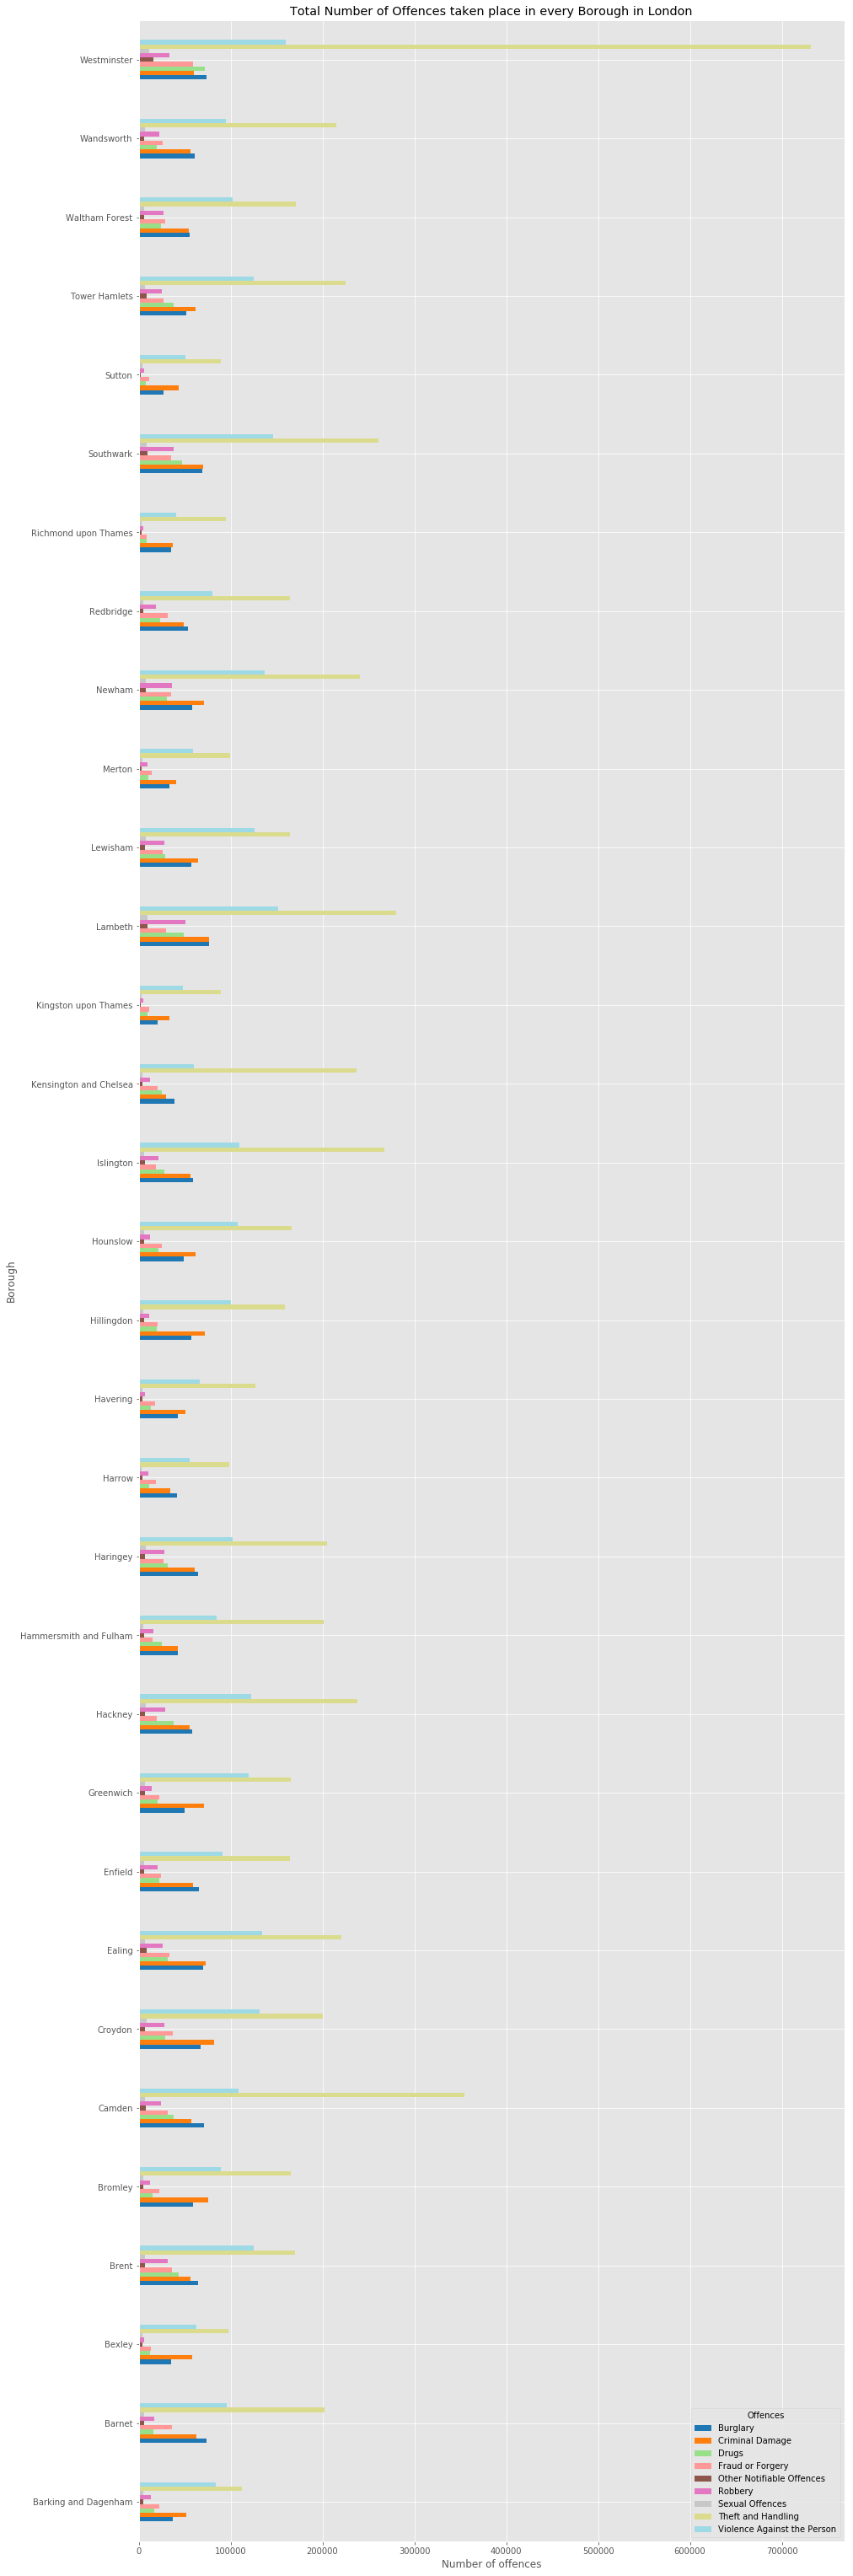

In [16]:
#This figure shows us the amount of offences that have taken place in every borough in each location.
#Aggregate Boroughs
ax = total_offences_in_B['Number_of_offences'].plot.barh(rot=0, figsize =(15,55), colormap = 'tab20')
ax.set_title('''Total Number of Offences taken place in every Borough in London''')
ax.set_xlabel('Number of offences')
ax.set_ylabel('Borough')
plt.savefig('1',dpi=300, bbox_inches = 'tight')
plt.show()

In [17]:
#Grouping everything by only one index, Location.
total_offences_in_L = df.groupby(level='Location').sum()
total_offences_in_L

Number_of_offences                                           \
Offences           Burglary Criminal Damage   Drugs Fraud or Forgery   
Location                                                               
Inner                781588          763049  471437           371770   
Outer                939057         1069674  357263           436387   

                                                                               \
Offences Other Notifiable Offences Robbery Sexual Offences Theft and Handling   
Location                                                                        
Inner                       103893  365975           96437            3622302   
Outer                        94955  280082           95624            2759760   

                                         Rate                          \
Offences Violence Against the Person Burglary Criminal Damage   Drugs   
Location                                                                
Inner                        1529871   3395.1          3306.1  2025.4   
Outer                        1645359   3719.4          4391.4  1383.8   

                                                                             \
Offences Fraud or Forgery Other Notifiable Offences Robbery Sexual Offences   
Location                                                                      
Inner              1668.3                     445.8  1550.4           407.9   
Outer              1775.9                     373.8  1085.6           377.8   

                                                         
Offences Theft and Handling Violence Against the Person  
Location                                                 
Inner               16178.4                      6495.6  
Outer               11059.6                      6526.0

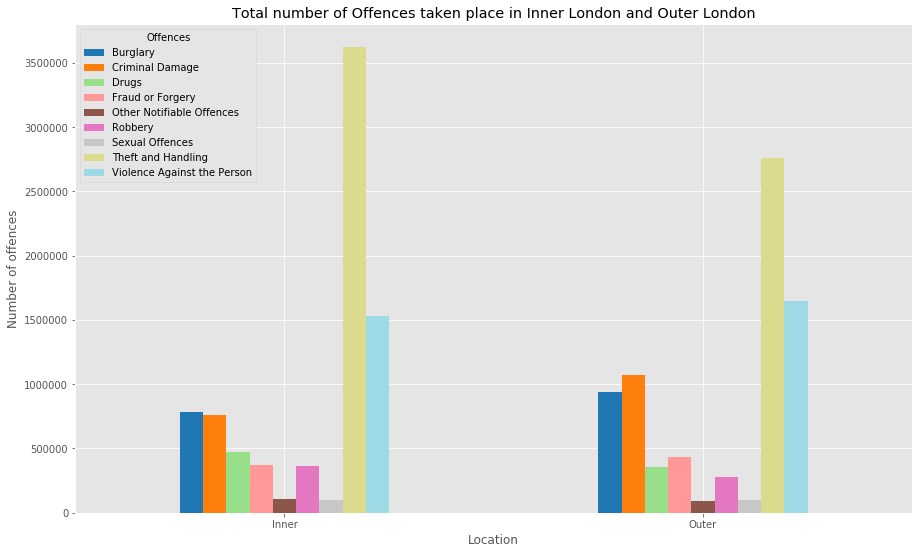

In [18]:
#Total number of Offences taken place in Inner London and Outer London
#Aggregate location
ax = total_offences_in_L['Number_of_offences'].plot.bar(rot=0, figsize =(15,9),colormap = 'tab20')
ax.set_title('''Total number of Offences taken place in Inner London and Outer London''')
ax.set_ylabel('Number of offences')
plt.savefig('2',dpi=300, bbox_inches = 'tight')
plt.show()

In [19]:
#Displaying the Number of offences that took place in Harrow(Borough)
df.loc[
# row indexer
(
    '2016', #Year, which is an index
    slice(None), #Location can be written here, such as "Inner". Location is an index
    'Harrow'    #Borough, which is an index too
),
    # column indexer
: ].head()

Number_of_offences                        \
Offences                        Burglary Criminal Damage Drugs   
Year Location Borough                                            
2016 Outer    Harrow                1608            1025   365   

                                                                          \
Offences              Fraud or Forgery Other Notifiable Offences Robbery   
Year Location Borough                                                      
2016 Outer    Harrow                16                       235     300   

                                                          \
Offences              Sexual Offences Theft and Handling   
Year Location Borough                                      
2016 Outer    Harrow              243               3926   

                                                      Rate                  \
Offences              Violence Against the Person Burglary Criminal Damage   
Year Location Borough                                                        
2016 Outer    Harrow                         3591      6.5             4.1   

                                                                        \
Offences              Drugs Fraud or Forgery Other Notifiable Offences   
Year Location Borough                                                    
2016 Outer    Harrow    1.5              0.1                       0.9   

                                                                  \
Offences              Robbery Sexual Offences Theft and Handling   
Year Location Borough                                              
2016 Outer    Harrow      1.2             1.0               15.8   

                                                   
Offences              Violence Against the Person  
Year Location Borough                              
2016 Outer    Harrow                         14.4

In [20]:
#How many times an offence took place in 1999 in the Inner Locations of London 
df.Number_of_offences.xs(['1999', 'Inner'],
      level=['Year', 'Location']).unstack().head(14)

Offences         Borough               
Burglary         Camden                    5192
                 Hackney                   4805
                 Hammersmith and Fulham    3177
                 Haringey                  4358
                 Islington                 4902
                 Kensington and Chelsea    3450
                 Lambeth                   6914
                 Lewisham                  4129
                 Newham                    3874
                 Southwark                 5443
                 Tower Hamlets             3724
                 Wandsworth                4695
                 Westminster               5532
Criminal Damage  Camden                    4557
dtype: int64

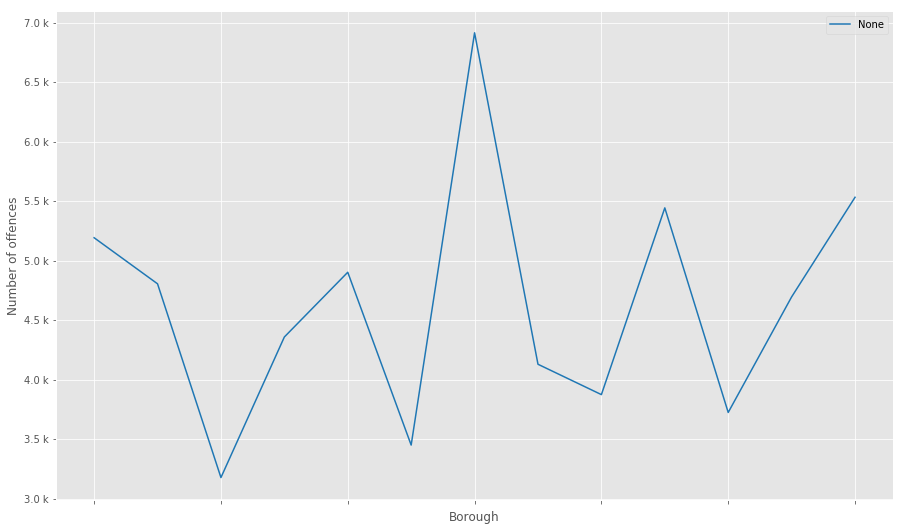

In [134]:
# All inner boroughs in 1999.
p = df.xs(['1999', 'Inner'],
      level=['Year', 'Location']).unstack()
ax = p.Number_of_offences.Burglary.plot(figsize =(15,9),colormap = 'tab20')
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('3',dpi=300, bbox_inches = 'tight')

#The below plot shows us the number of BURGLARIES that took place in Inner London in 1999.
#The first point ahows us Camden's Burglary amount (5192), the second is Hackneys(4805).....

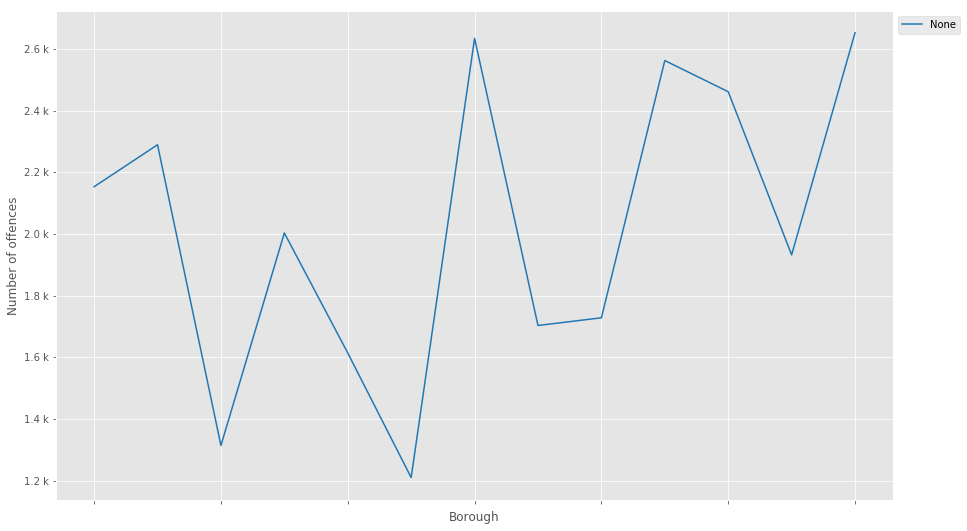

In [135]:
# All inner boroughs in 2016.
p = df.xs(['2016', 'Inner'],
      level=['Year', 'Location']).unstack()
ax = p.Number_of_offences.Burglary.plot(figsize =(15,9),colormap = 'tab20')
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('37',dpi=300, bbox_inches = 'tight')

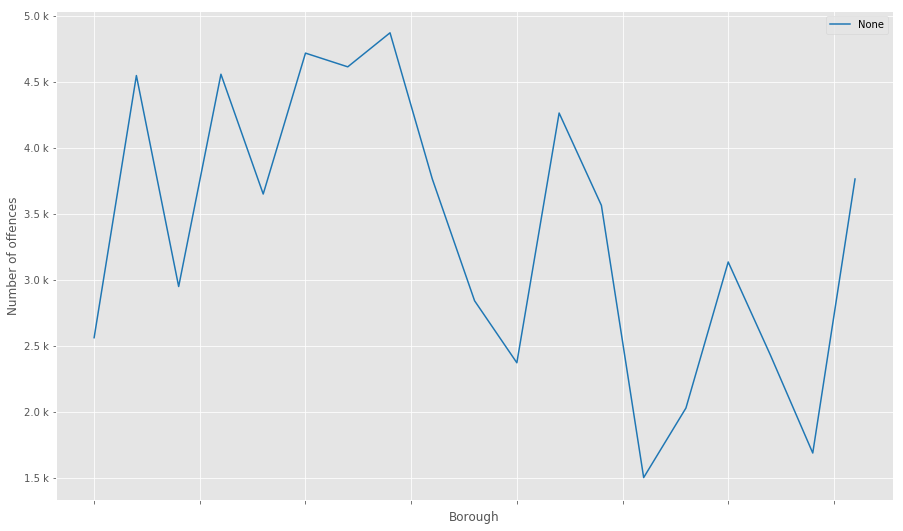

In [136]:
# All outer boroughs in 1999.
p = df.xs(['1999', 'Outer'],
      level=['Year', 'Location']).unstack()
ax = p.Number_of_offences.Burglary.plot(figsize =(15,9),colormap = 'tab20')
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('38',dpi=300, bbox_inches = 'tight')

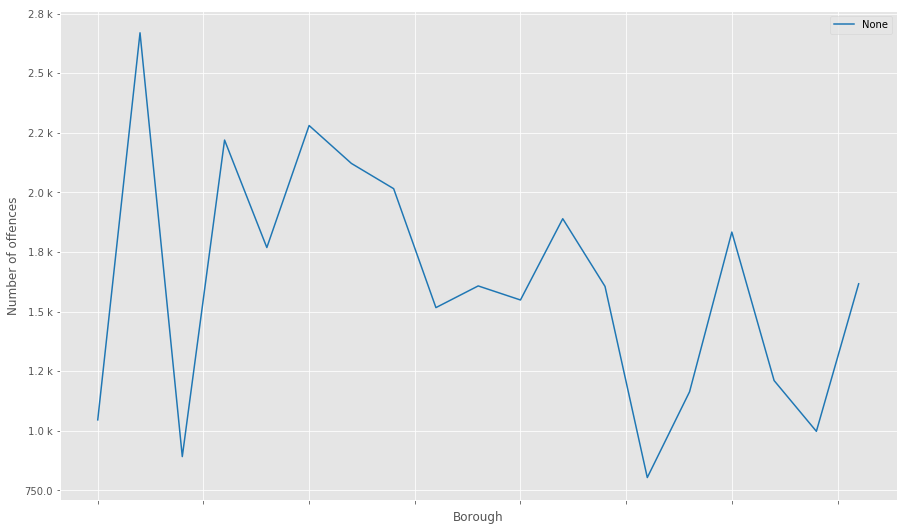

In [137]:
# All outer boroughs in 2016.
p = df.xs(['2016', 'Outer'],
      level=['Year', 'Location']).unstack()
ax = p.Number_of_offences.Burglary.plot(figsize =(15,9),colormap = 'tab20')
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('39',dpi=300, bbox_inches = 'tight')

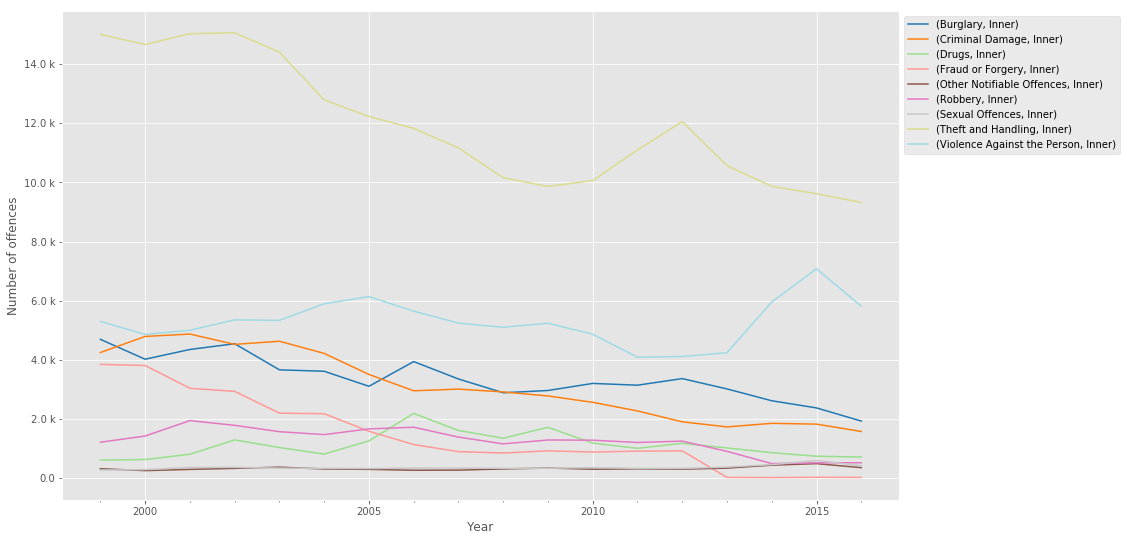

In [22]:
#Returns a cross section of an Inner London Borough
#The figure shows us the offences that took place in Wandsworth(Borough) in every year
inner = df.xs('Wandsworth', level='Borough').unstack() 
ax = inner['Number_of_offences'].plot(figsize =(15,9),colormap = 'tab20') 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('4',dpi=300, bbox_inches = 'tight')
plt.show()

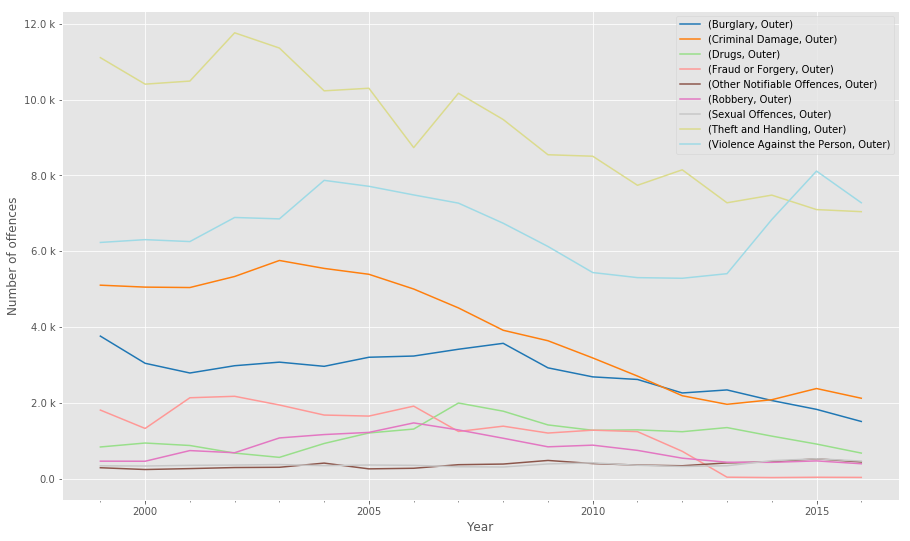

In [23]:
#Outer London borough
#The figure shows us the offences that took place in Greenwich(Borough) in every year
outer = df.xs('Greenwich', level='Borough').unstack() 
ax = outer['Number_of_offences'].plot(figsize =(15,9), colormap = 'tab20') 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('5',dpi=300, bbox_inches = 'tight')
plt.show()

In [24]:
# Group by index levels year and location, and sum values.
in_out = df.groupby(level=['Year', 'Location']).sum()
in_out.head()

Number_of_offences                                          \
Offences                Burglary Criminal Damage  Drugs Fraud or Forgery   
Year Location                                                              
1999 Inner                 60195           63212  15236            52533   
     Outer                 63855           80521  10270            48910   
2000 Inner                 54957           62064  13837            41331   
     Outer                 57367           81978   9744            40919   
2001 Inner                 57755           62585  15662            41357   

                                                                 \
Offences      Other Notifiable Offences Robbery Sexual Offences   
Year Location                                                     
1999 Inner                         5546   23217            4820   
     Outer                         4498   12792            4063   
2000 Inner                         5051   26021            4647   
     Outer                         4293   14964            4082   
2001 Inner                         5598   33010            5322   

                                                                 Rate  \
Offences      Theft and Handling Violence Against the Person Burglary   
Year Location                                                           
1999 Inner                235130                       77921    289.1   
     Outer                173113                       73667    272.2   
2000 Inner                238719                       77302    260.8   
     Outer                172202                       77638    242.5   
2001 Inner                258185                       79445    265.0   

                                                      \
Offences      Criminal Damage Drugs Fraud or Forgery   
Year Location                                          
1999 Inner              301.6  74.4            256.9   
     Outer              348.8  44.6            206.1   
2000 Inner              289.3  66.0            194.3   
     Outer              353.4  42.2            174.4   
2001 Inner              285.7  72.6            188.3   

                                                                 \
Offences      Other Notifiable Offences Robbery Sexual Offences   
Year Location                                                     
1999 Inner                         27.3   109.9            22.9   
     Outer                         19.4    52.0            17.4   
2000 Inner                         24.4   119.0            21.6   
     Outer                         18.2    61.1            17.1   
2001 Inner                         26.3   147.0            24.2   

                                                              
Offences      Theft and Handling Violence Against the Person  
Year Location                                                 
1999 Inner                1166.6                       372.7  
     Outer                 743.9                       318.0  
2000 Inner                1160.3                       362.0  
     Outer                 732.8                       331.5  
2001 Inner                1222.1                       363.5

In [25]:
#Unstacking . It is much easier to read compared to the above figure. 
#The inner and outer rows become columns
in_out = in_out.unstack()
in_out.head(3)

Number_of_offences                                              \
Offences           Burglary        Criminal Damage         Drugs          
Location              Inner  Outer           Inner  Outer  Inner  Outer   
Year                                                                      
1999                  60195  63855           63212  80521  15236  10270   
2000                  54957  57367           62064  81978  13837   9744   
2001                  57755  58193           62585  85067  15662  10481   

                                                                  ...    \
Offences Fraud or Forgery        Other Notifiable Offences        ...     
Location            Inner  Outer                     Inner Outer  ...     
Year                                                              ...     
1999                52533  48910                      5546  4498  ...     
2000                41331  40919                      5051  4293  ...     
2001                41357  45202                      5598  4640  ...     

                              Rate                                            \
Offences Other Notifiable Offences       Robbery       Sexual Offences         
Location                     Inner Outer   Inner Outer           Inner Outer   
Year                                                                           
1999                          27.3  19.4   109.9  52.0            22.9  17.4   
2000                          24.4  18.2   119.0  61.1            21.6  17.1   
2001                          26.3  19.8   147.0  83.3            24.2  19.4   

                                                                       
Offences Theft and Handling        Violence Against the Person         
Location              Inner  Outer                       Inner  Outer  
Year                                                                   
1999                 1166.6  743.9                       372.7  318.0  
2000                 1160.3  732.8                       362.0  331.5  
2001                 1222.1  763.1                       363.5  347.4  

[3 rows x 36 columns]

In [26]:
in_out = in_out['Number_of_offences']

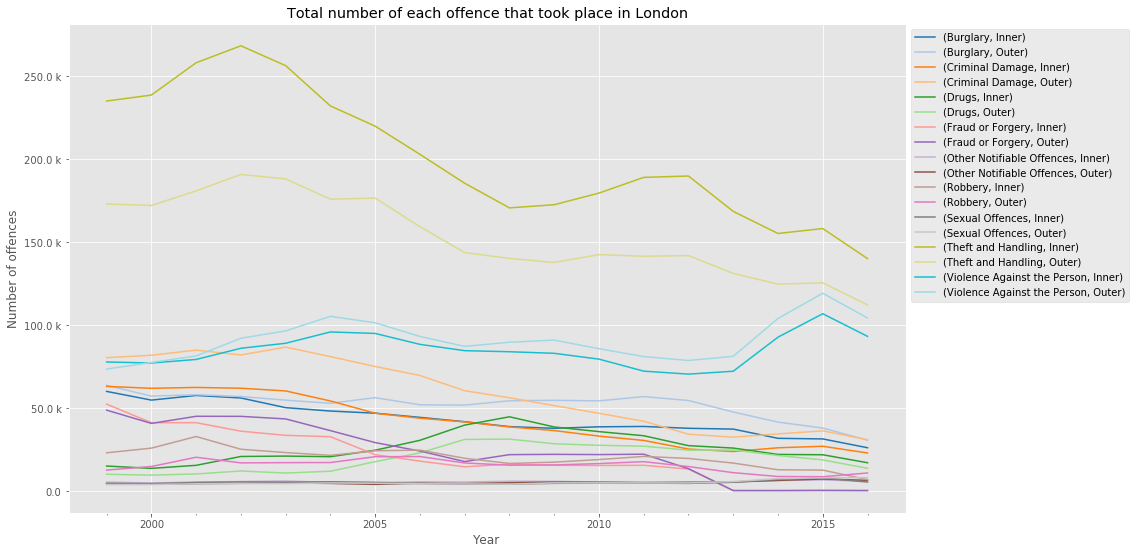

In [27]:
#Plot of the total number of each offence that took place in London
ax = in_out.plot(figsize=(15,9), colormap='tab20') 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Total number of each offence that took place in London')
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('6',dpi=300, bbox_inches = 'tight')
plt.show()

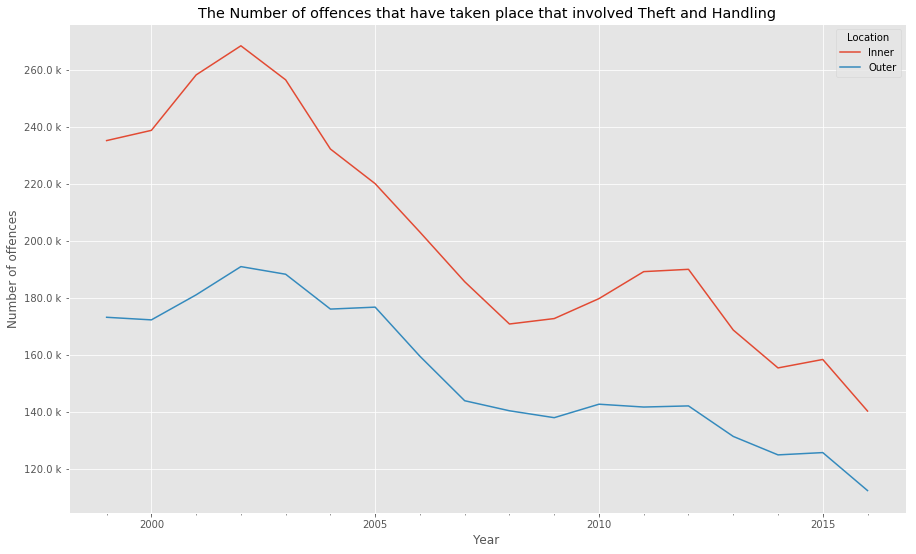

In [140]:
#The Number of offences that have taken place that involved Theft and Handling.
in_out_tnHandling = in_out['Theft and Handling']
ax = in_out_tnHandling.plot(figsize=(15,9)) 
ax.set_ylabel('Number of offences')
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('The Number of offences that have taken place that involved Theft and Handling')
plt.savefig('7',dpi=300, bbox_inches = 'tight')
plt.show()

In [128]:
y0 = in_out.Burglary.Inner
y1 = in_out.Burglary.Outer


trace0 = go.Box(
    name = 'Inner London',
    y=y0
)
trace1 = go.Box(
    name = 'Outer London',
    y=y1
)

data = [trace0, trace1]
iplot(data)



In [124]:
in_out.Burglary.Outer.describe()

count       18.000000
mean     52169.833333
std       7976.592493
min      30814.000000
25%      51990.250000
50%      54627.000000
75%      56914.750000
max      63855.000000
Name: Outer, dtype: float64

In [125]:
in_out.Burglary.Outer

Year
1999    63855
2000    57367
2001    58193
2002    57124
2003    54918
2004    53048
2005    56404
2006    52132
2007    51943
2008    54545
2009    54826
2010    54495
2011    57085
2012    54709
2013    47772
2014    41703
2015    38124
2016    30814
Freq: A-DEC, Name: Outer, dtype: int64

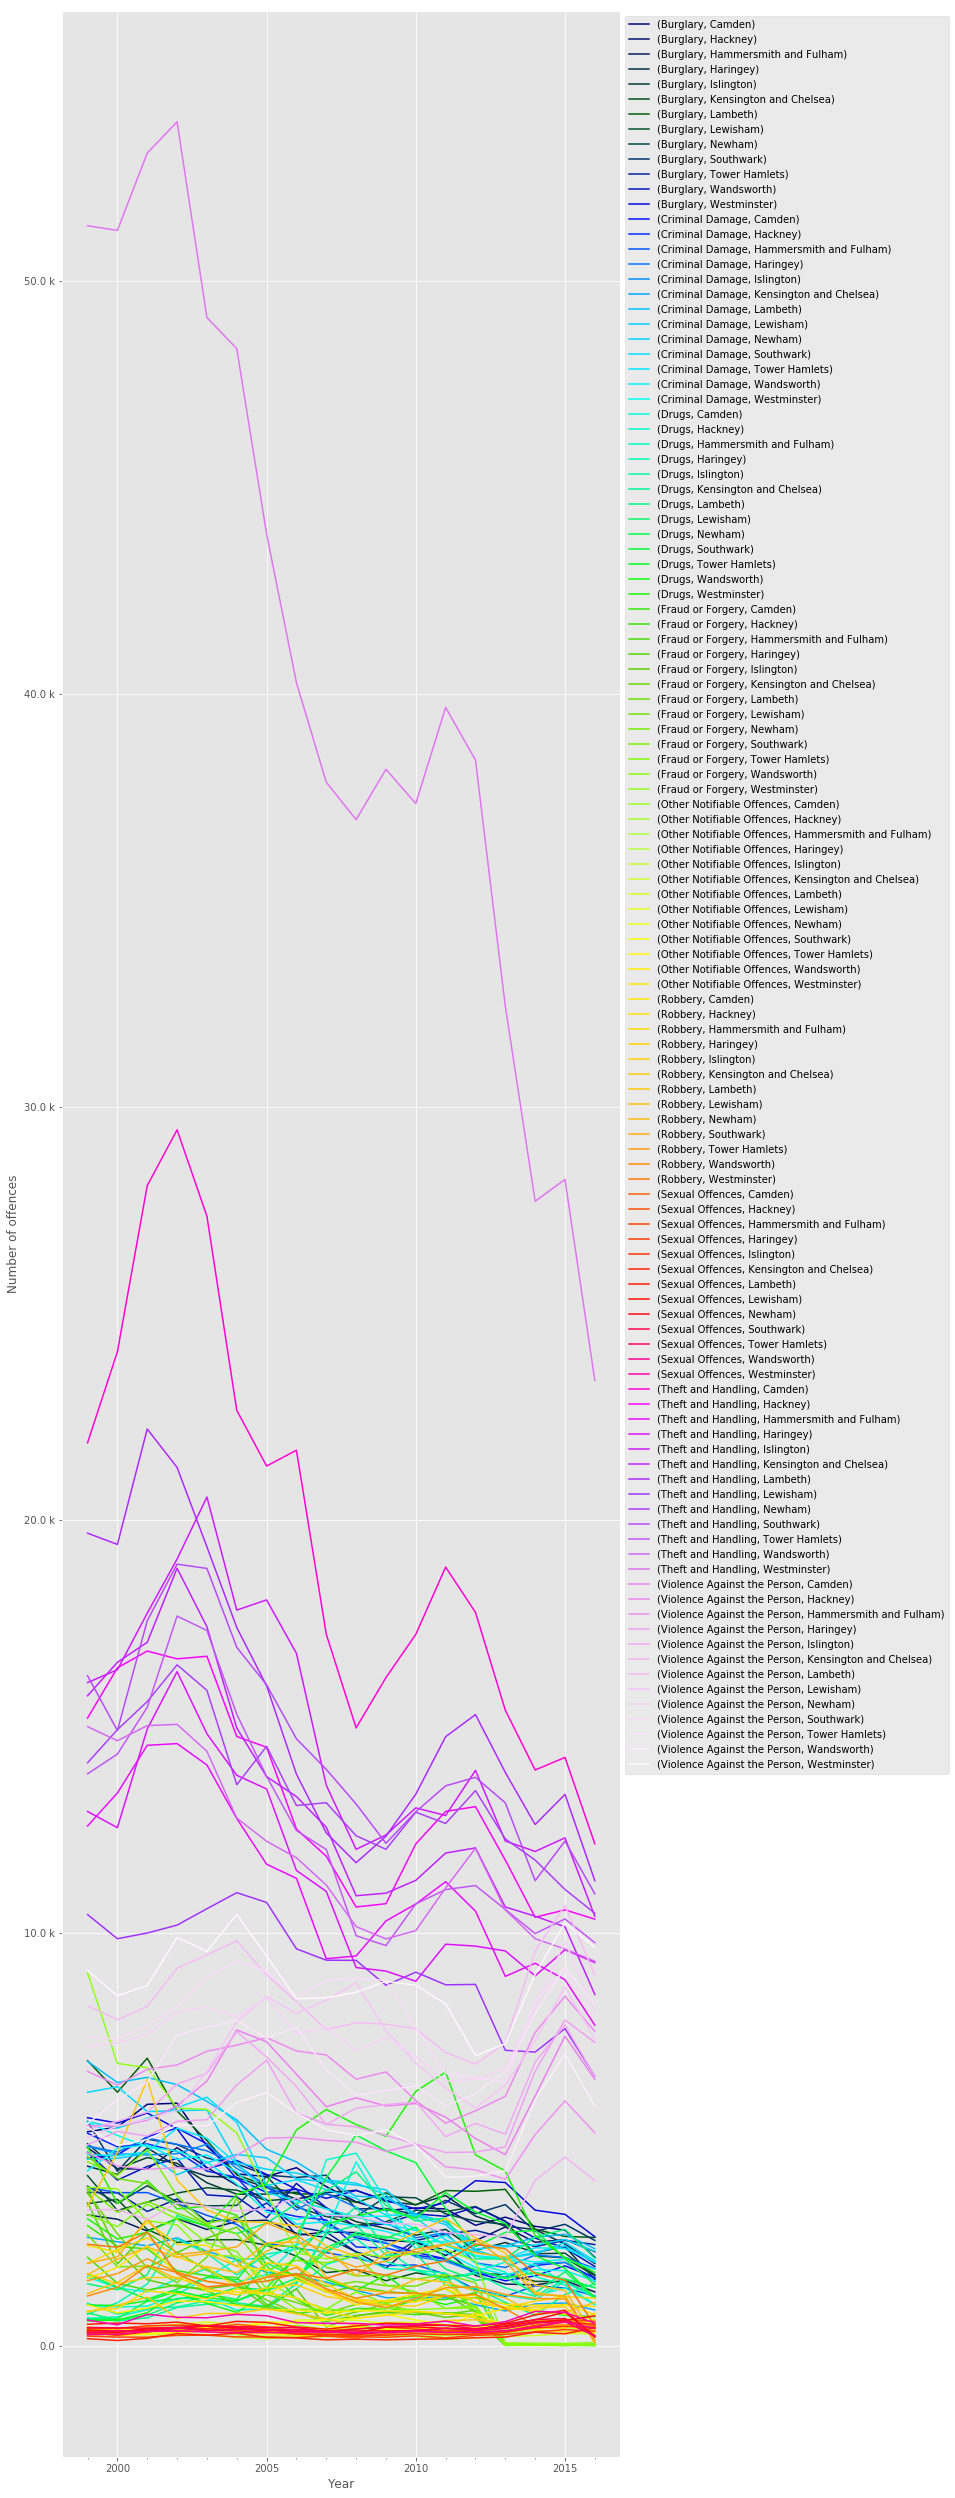

In [30]:
#Plot that shows every offence that took place in London
inner = df.xs('Inner', level='Location').unstack() 
ax = inner['Number_of_offences'].plot(colormap='gist_ncar',figsize = (10,45)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('8',dpi=300, bbox_inches = 'tight')
plt.show()

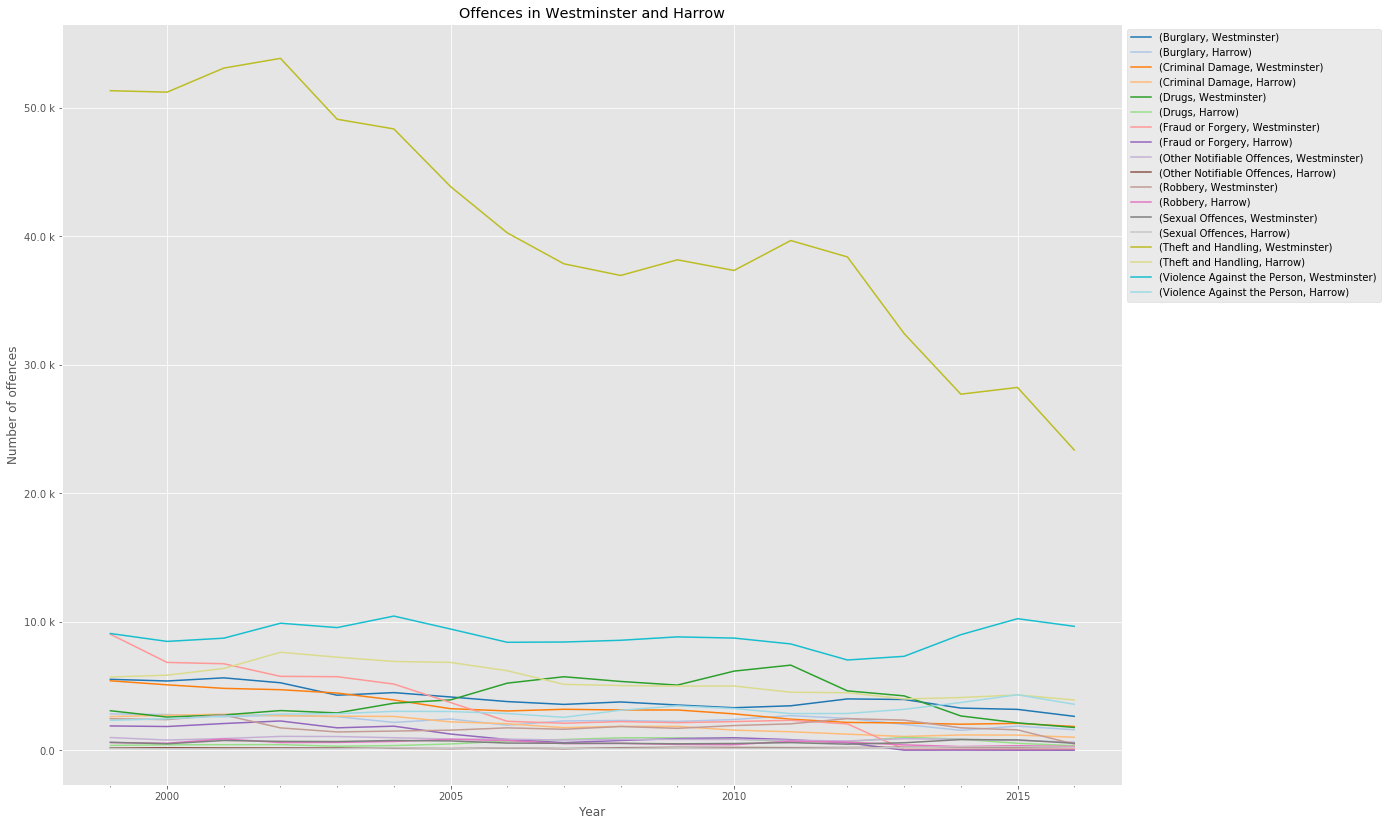

In [31]:
#Comparing the number of offences that took place every year in Westminister and Harrow

#The Location index is removed as we don't need it to compare the two Boroughs
df2 = df.reset_index(level='Location', drop=True) #drop = True, doesnt show the Location column

#Re-sort the index: required for using slice(). ts2.sort_index(inplace=True)
b1 = 'Westminster'
b2 = 'Harrow'
#Select all times, and slice out only boroughs we are interested in. # Select only density column.
ax = df2.loc[(slice(None), [b1, b2]), 'Number_of_offences'].unstack().plot(figsize=(19,14), colormap='tab20') 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('''Offences in {} and {}'''.format(b1, b2))
ax.set_ylabel('Number of offences')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('9',dpi=300, bbox_inches = 'tight')
plt.show()

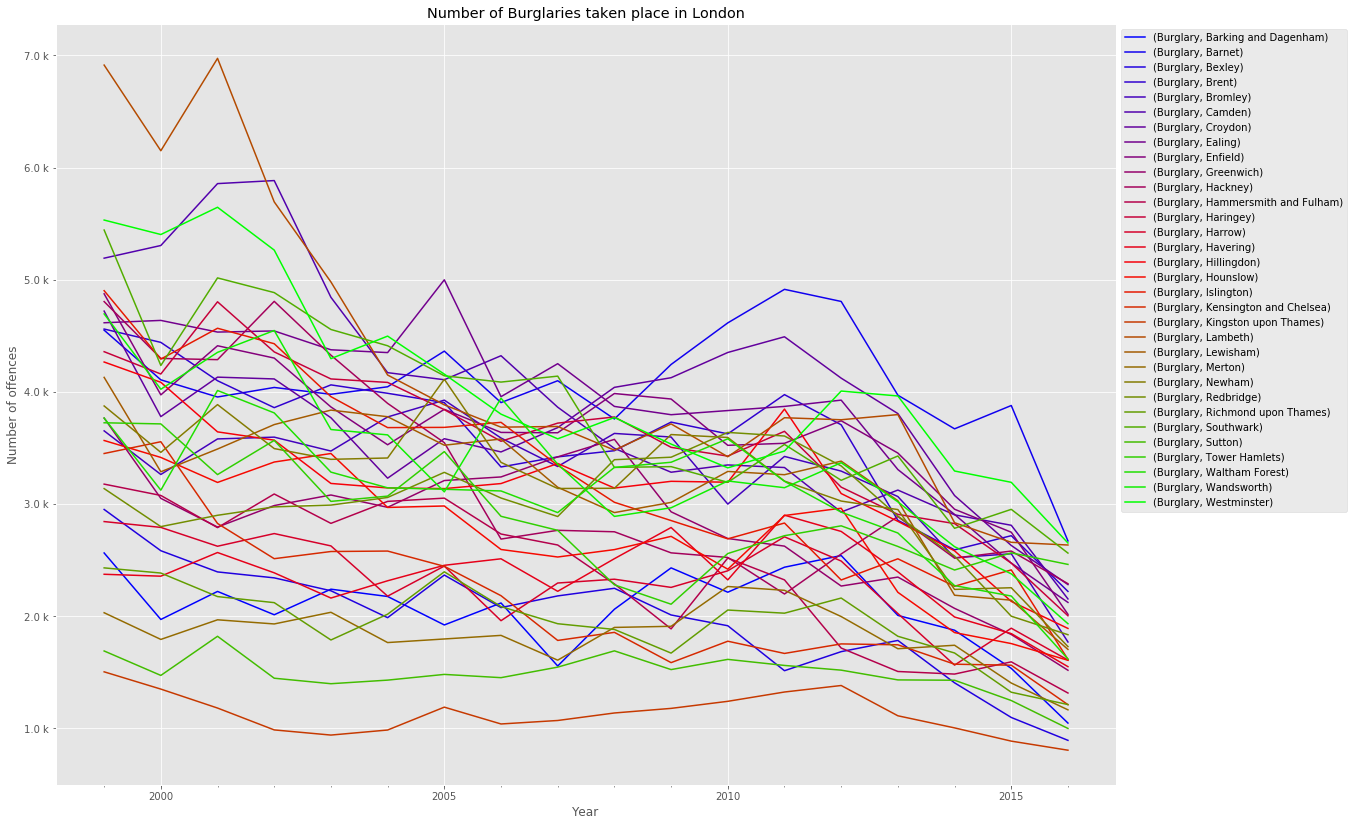

In [141]:
#Amount of Burglaries that took place in London every year

#The Location index is removed as we don't need it to compare the two Boroughs
df_ = df.reset_index(level='Location', drop=True)
#Convert inner-level index to columns.
df_ = df_['Number_of_offences'].unstack()
b1 = 'Burglary'
#As boroughs are now columns, we can just select the # individual boroughs we are interested in.
ax = df_[[b1]].plot(figsize=(19,14), colormap='brg') 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('''Number of Burglaries taken place in London'''.format(b1, b2))
ax.set_ylabel('Number of offences') 
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('10',dpi=300, bbox_inches = 'tight')
plt.show()

In [157]:
print(df_.Burglary['Kingston upon Thames'])
print(df_.Burglary['Lambeth'])

Year
1999    1503
2000    1349
2001    1180
2002     985
2003     939
2004     984
2005    1188
2006    1038
2007    1069
2008    1136
2009    1177
2010    1240
2011    1323
2012    1381
2013    1111
2014    1003
2015     885
2016     804
Freq: A-DEC, Name: Kingston upon Thames, dtype: int64
Year
1999    6914
2000    6150
2001    6974
2002    5694
2003    4980
2004    4150
2005    3884
2006    3685
2007    3691
2008    3480
2009    3714
2010    3421
2011    3769
2012    3751
2013    3797
2014    2833
2015    2658
2016    2634
Freq: A-DEC, Name: Lambeth, dtype: int64


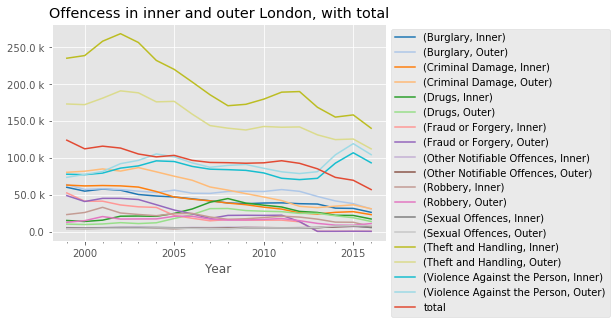

In [33]:
total = in_out.Burglary[['Inner','Outer']].sum(axis=1)
total.name = 'total'
title = '''Offencess in inner and outer London, with total'''
ax = in_out.plot(title=title,colormap='tab20')
# Add total to same axes.
total.plot(ax=ax, legend=True) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig('11',dpi=300, bbox_inches = 'tight')
plt.show()

<Figure size 432x288 with 0 Axes>

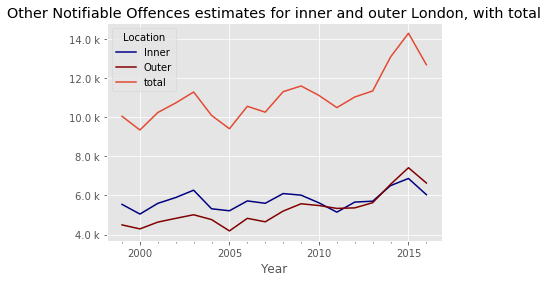

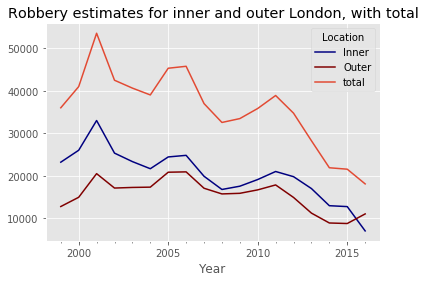

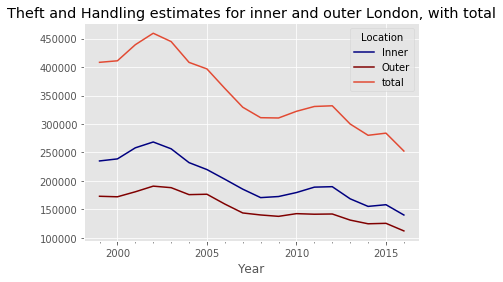

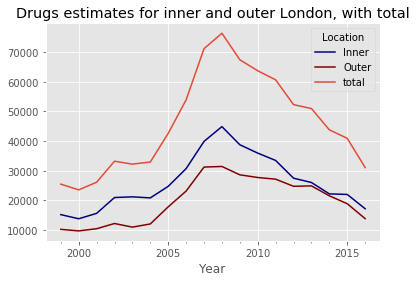

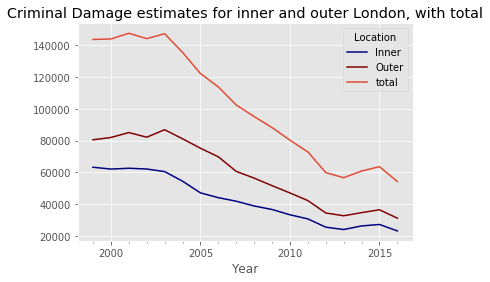

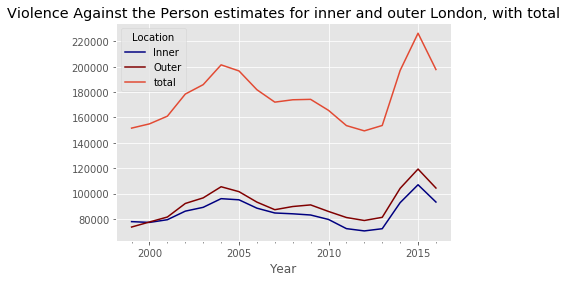

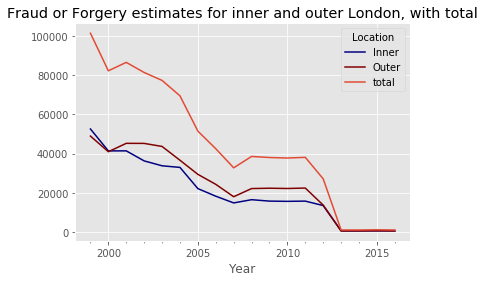

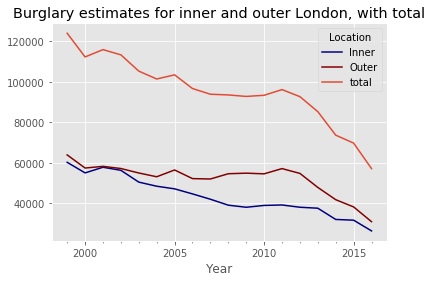

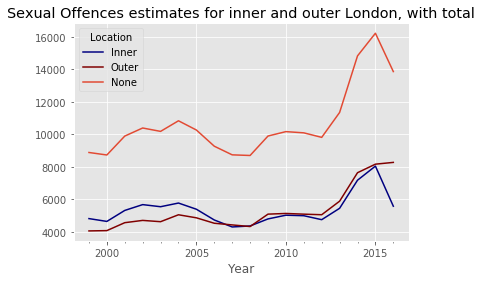

In [158]:
fig = plt.figure()


total = in_out['Other Notifiable Offences'][['Inner', 'Outer']].sum(axis=1)
total2 = in_out['Robbery'][['Inner', 'Outer']].sum(axis=1)
total3 =  in_out['Theft and Handling'][['Inner', 'Outer']].sum(axis=1)
total4 =  in_out['Drugs'][['Inner', 'Outer']].sum(axis=1)
total5 =  in_out['Criminal Damage'][['Inner', 'Outer']].sum(axis=1)
total6 =  in_out['Violence Against the Person'][['Inner', 'Outer']].sum(axis=1)
total7 =  in_out['Fraud or Forgery'][['Inner', 'Outer']].sum(axis=1)
total8 =  in_out['Burglary'][['Inner', 'Outer']].sum(axis=1)
total9 =  in_out['Sexual Offences'][['Inner', 'Outer']].sum(axis=1)


total.name = 'total'
total2.name = 'total'
total3.name = 'total'
total4.name = 'total'
total5.name = 'total'
total6.name = 'total'
total7.name = 'total'
total8.name = 'total'

title = '''Other Notifiable Offences estimates for inner and outer London, with total'''
title2 = '''Robbery estimates for inner and outer London, with total'''
title3 = '''Theft and Handling estimates for inner and outer London, with total'''
title4 = '''Drugs estimates for inner and outer London, with total'''
title5 = '''Criminal Damage estimates for inner and outer London, with total'''
title6 = '''Violence Against the Person estimates for inner and outer London, with total'''
title7 = '''Fraud or Forgery estimates for inner and outer London, with total'''
title8 = '''Burglary estimates for inner and outer London, with total'''
title9 = '''Sexual Offences estimates for inner and outer London, with total'''


ax1 = in_out['Other Notifiable Offences'].plot(title=title,colormap='jet')
ax2 = in_out['Robbery'].plot(title=title2,colormap='jet')
ax3 = in_out['Theft and Handling'].plot(title=title3,colormap='jet')
ax4 = in_out['Drugs'].plot(title=title4,colormap='jet')
ax5 = in_out['Criminal Damage'].plot(title=title5,colormap='jet')
ax6 = in_out['Violence Against the Person'].plot(title=title6,colormap='jet')
ax7 = in_out['Fraud or Forgery'].plot(title=title7,colormap='jet')
ax8 = in_out['Burglary'].plot(title=title8,colormap='jet')
ax9 = in_out['Sexual Offences'].plot(title=title9,colormap='jet')


# Add total to same axes.
total.plot(ax=ax1, legend=True) 
total2.plot(ax=ax2, legend=True) 
total3.plot(ax=ax3, legend=True) 
total4.plot(ax=ax4, legend=True) 
total5.plot(ax=ax5, legend=True) 
total6.plot(ax=ax6, legend=True) 
total7.plot(ax=ax7, legend=True) 
total8.plot(ax=ax8, legend=True) 
total9.plot(ax=ax9, legend=True) 
plt.savefig('0',dpi=300, bbox_inches = 'tight')
ax1.yaxis.set_major_formatter(EngFormatter(places=1)) 

## Difference between the number of Burglaries that took place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [35]:
diff_Burglary = in_out.Burglary['Outer'] - in_out.Burglary['Inner']
diff_Burglary.name = 'difference'
diff_Burglary

Year
1999     3660
2000     2410
2001      438
2002      888
2003     4519
2004     4680
2005     9333
2006     7566
2007    10013
2008    15556
2009    16865
2010    15632
2011    17996
2012    16738
2013    10285
2014     9774
2015     6557
2016     4559
Freq: A-DEC, Name: difference, dtype: int64

In [36]:
diff_Burglary.max(), diff_Burglary.min(), diff_Burglary.mean()

(17996, 438, 8748.277777777777)

In [37]:
#Find the year in which the difference was biggest.
max_offence_year = diff_Burglary.idxmax()
max_offence_year

Period('2011', 'A-DEC')

In [38]:
diff_Burglary.loc[max_offence_year]

17996

In [39]:
outer_max = in_out.Burglary.loc[max_offence_year, 'Outer'] 
inner_max = in_out.Burglary.loc[max_offence_year, 'Inner']
b = (outer_max - inner_max) / 3 + inner_max

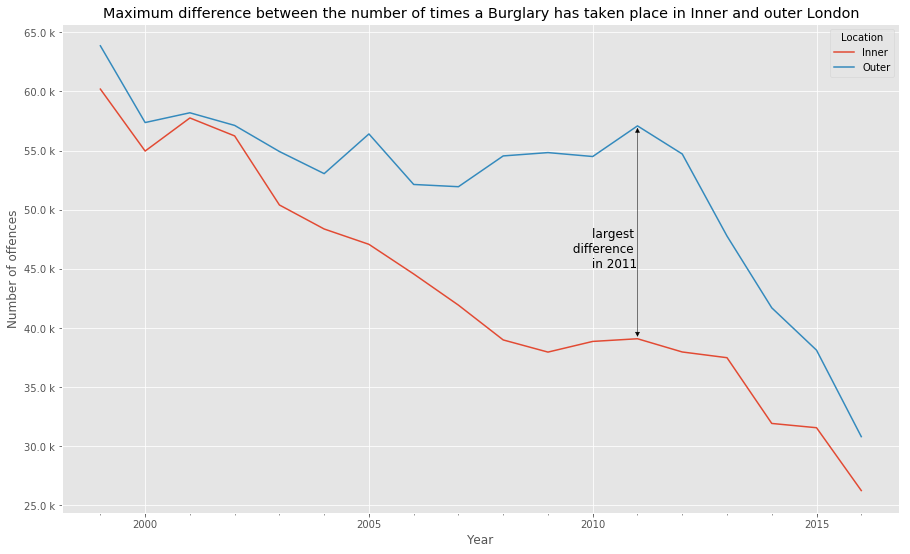

In [40]:
ax = in_out.Burglary[['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum difference between the number of times a Burglary has taken place in Inner and outer London')
max_offence_year = diff_Burglary.idxmax()

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('12',dpi=300, bbox_inches = 'tight')
plt.show()




### MINIMUM DIFFERENCE

In [41]:
min_offence_year = diff_Burglary.idxmin()
diff_Burglary.loc[min_offence_year]

438

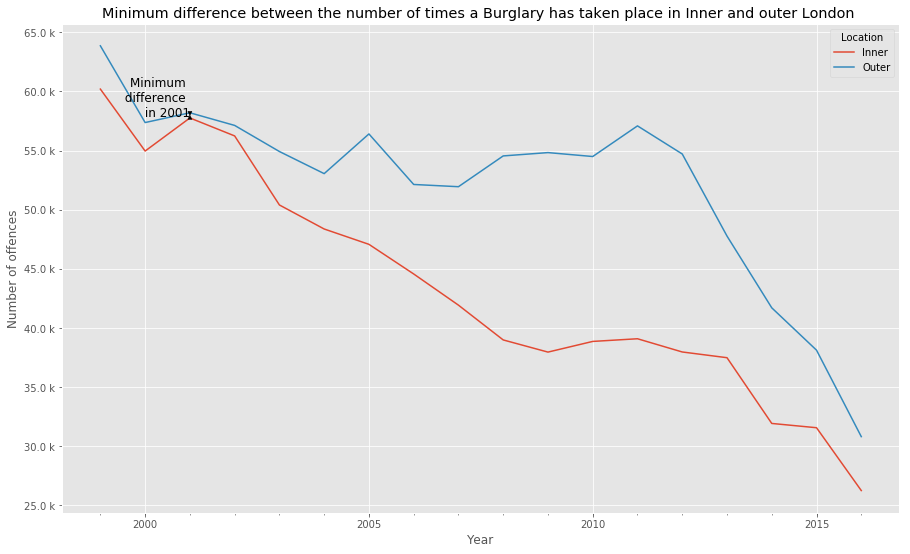

In [42]:
#Find the year in which the difference was smallest.
outer_min = in_out.Burglary.loc[min_offence_year, 'Outer'] 
inner_min = in_out.Burglary.loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out.Burglary[['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times a Burglary has taken place in Inner and outer London ')
ax.text(min_offence_year ,b, 'Minimum \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('13',dpi=300, bbox_inches = 'tight')
plt.show()


## Difference between the number of Robberies that took place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [43]:
diff_Robbery = -in_out.Robbery['Outer'] + in_out.Robbery['Inner']
diff_Robbery.name = 'difference'
diff_Robbery
#This one is interesting as the more robberies have occured in Inner London than Outer London

Year
1999    10425
2000    11057
2001    12489
2002     8215
2003     6075
2004     4332
2005     3590
2006     3886
2007     2816
2008     1046
2009     1672
2010     2432
2011     3159
2012     4884
2013     5772
2014     4063
2015     3977
2016    -3997
Freq: A-DEC, Name: difference, dtype: int64

In [44]:
diff_Robbery.max(), diff_Robbery.min(), diff_Robbery.mean()

(12489, -3997, 4771.833333333333)

In [45]:
#Find the year in which the difference was biggest.
max_offence_year = diff_Robbery.idxmax()
max_offence_year

Period('2001', 'A-DEC')

In [46]:
diff_Robbery.loc[max_offence_year]

12489

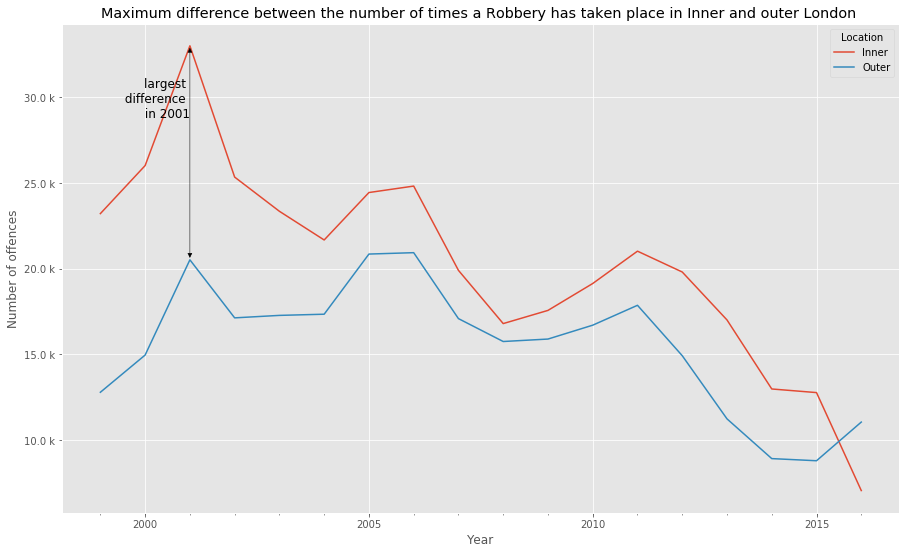

In [47]:
outer_max = in_out.Robbery.loc[max_offence_year, 'Outer'] 
inner_max = in_out.Robbery.loc[max_offence_year, 'Inner']
b = (outer_max - inner_max) / 3 + inner_max
ax = in_out.Robbery[['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum difference between the number of times a Robbery has taken place in Inner and outer London ')
max_offence_year = diff_Robbery.idxmax()

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('14',dpi=300, bbox_inches = 'tight')
plt.show()

### MINIMUM DIFFERENCE

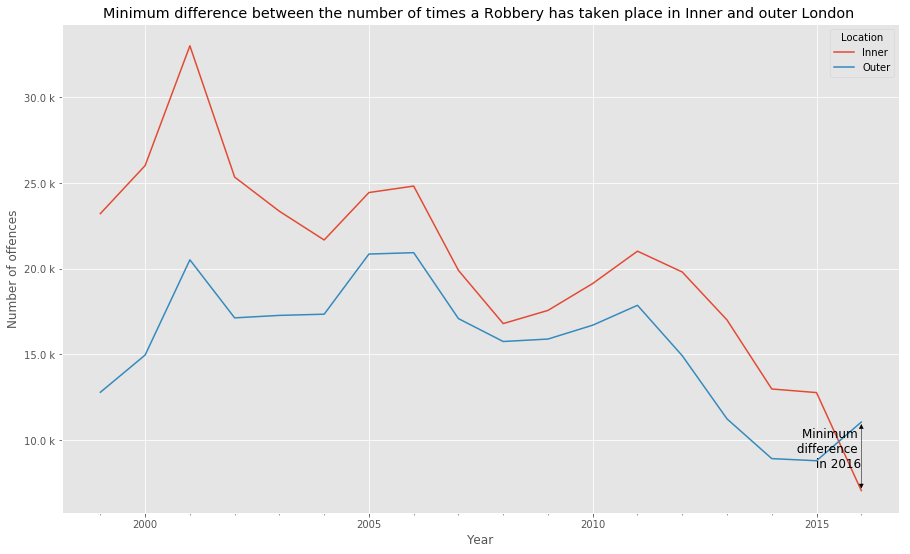

In [48]:
#Find the year in which the difference was smallest.
min_offence_year = diff_Robbery.idxmin()

outer_min = in_out.Robbery.loc[min_offence_year, 'Outer'] 
inner_min = in_out.Robbery.loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out.Robbery[['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times a Robbery has taken place in Inner and outer London ')
ax.text(min_offence_year ,b, 'Minimum \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('15',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of offences that involved Drugs that took place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [49]:
diff_Drugs = -in_out.Drugs['Outer'] + in_out.Drugs['Inner']
print(diff_Drugs, diff_Drugs.max(), diff_Drugs.min(), diff_Burglary.mean())

Year
1999     4966
2000     4093
2001     5181
2002     8752
2003    10206
2004     8782
2005     6899
2006     7574
2007     8646
2008    13439
2009    10130
2010     8218
2011     6307
2012     2732
2013     1137
2014      652
2015     3120
2016     3340
Freq: A-DEC, dtype: int64 13439 652 8748.277777777777


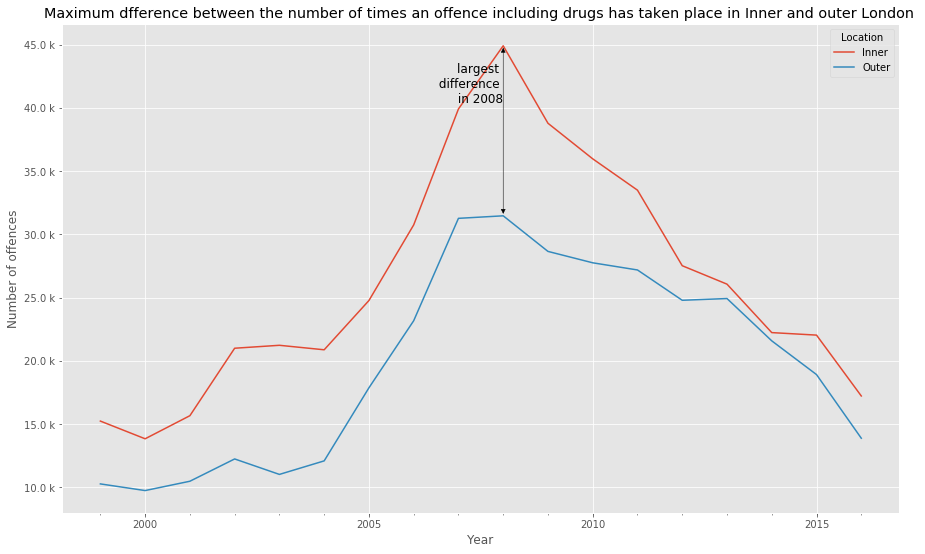

In [159]:
max_offence_year = diff_Drugs.idxmax()
diff_Drugs.loc[max_offence_year]
outer_max = in_out.Drugs.loc[max_offence_year, 'Outer'] 
inner_max = in_out.Drugs.loc[max_offence_year, 'Inner']
b = (outer_max - inner_max) / 3 + inner_max
ax = in_out.Drugs[['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times an offence including drugs has taken place in Inner and outer London ')
max_offence_year = diff_Drugs.idxmax()

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('16',dpi=300, bbox_inches = 'tight')
plt.show()




### MINIMUM DIFFERENCE

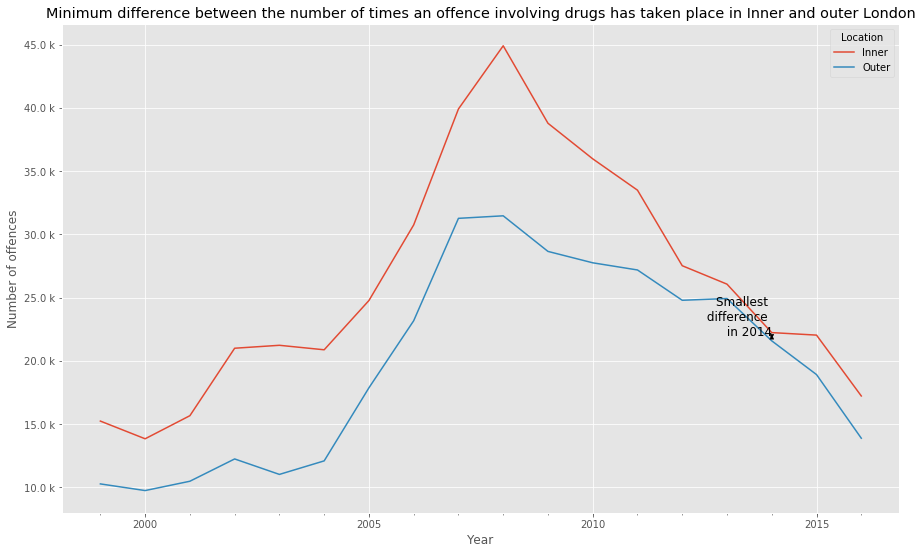

In [160]:
#Find the year in which the difference was smallest.
min_offence_year = diff_Drugs.idxmin()


outer_min = in_out.Drugs.loc[min_offence_year, 'Outer'] 
inner_min = in_out.Drugs.loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out.Drugs[['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times an offence involving drugs has taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('17',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of offences where Criminal Damage that took place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [52]:
diff_CDamage = in_out['Criminal Damage']['Outer'] - in_out['Criminal Damage']['Inner']
print(diff_CDamage,'\n', diff_CDamage.max(), diff_CDamage.min(), diff_CDamage.mean())

Year
1999    17309
2000    19914
2001    22482
2002    20037
2003    26387
2004    26700
2005    28138
2006    25735
2007    18788
2008    17561
2009    15012
2010    13760
2011    11537
2012     8939
2013     8676
2014     8364
2015     9268
2016     8018
Freq: A-DEC, dtype: int64 
 28138 8018 17034.722222222223


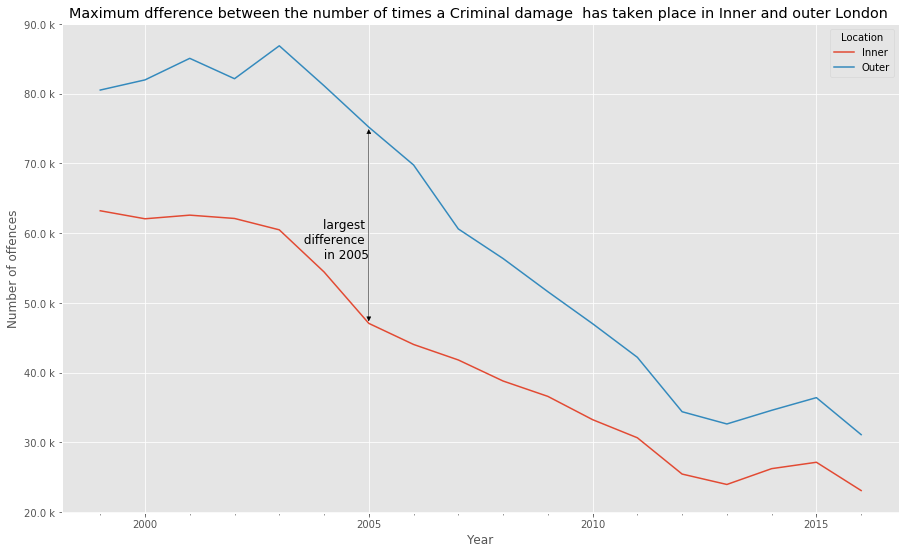

In [53]:
max_offence_year = diff_CDamage.idxmax()
diff_CDamage.loc[max_offence_year]
outer_max = in_out['Criminal Damage'].loc[max_offence_year, 'Outer'] 
inner_max = in_out['Criminal Damage'].loc[max_offence_year, 'Inner']
b = (outer_max - inner_max) / 3 + inner_max
ax = in_out['Criminal Damage'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times a Criminal damage  has taken place in Inner and outer London ')
max_offence_year = diff_CDamage.idxmax()

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('18',dpi=300, bbox_inches = 'tight')
plt.show()

### MINIMUM DIFFERENCE


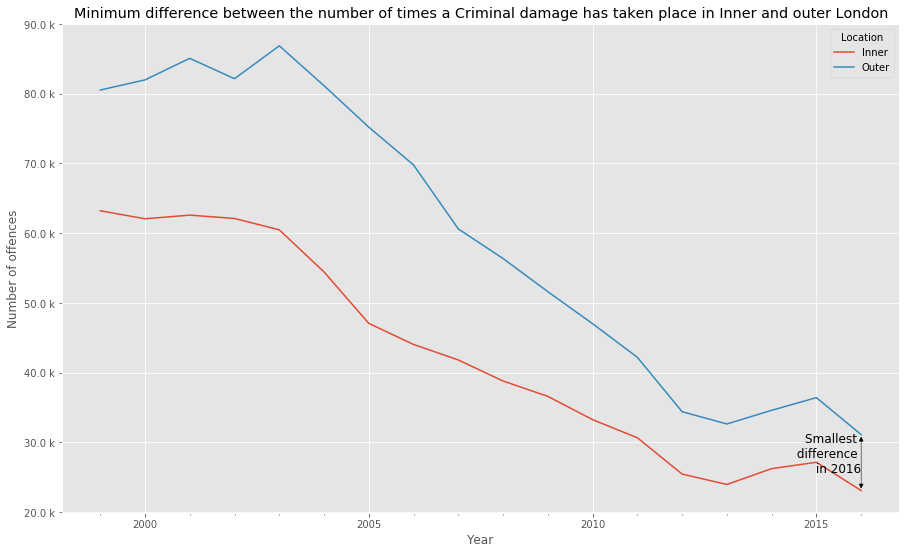

In [54]:
#Find the year in which the difference was smallest.
min_offence_year = diff_CDamage.idxmin()


outer_min = in_out['Criminal Damage'].loc[min_offence_year, 'Outer'] 
inner_min = in_out['Criminal Damage'].loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out['Criminal Damage'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times a Criminal damage has taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('19',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of  Sexual offences that took place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [55]:
diff_SOffence = in_out['Sexual Offences']['Outer'] - in_out['Sexual Offences']['Inner']
print(diff_SOffence,'\n', diff_SOffence.max(), diff_SOffence.min(), diff_SOffence.mean())

Year
1999    -757
2000    -565
2001    -753
2002    -970
2003    -920
2004    -721
2005    -528
2006    -201
2007     126
2008     -35
2009     294
2010     107
2011      96
2012     304
2013     437
2014     461
2015     119
2016    2693
Freq: A-DEC, dtype: int64 
 2693 -970 -45.166666666666664


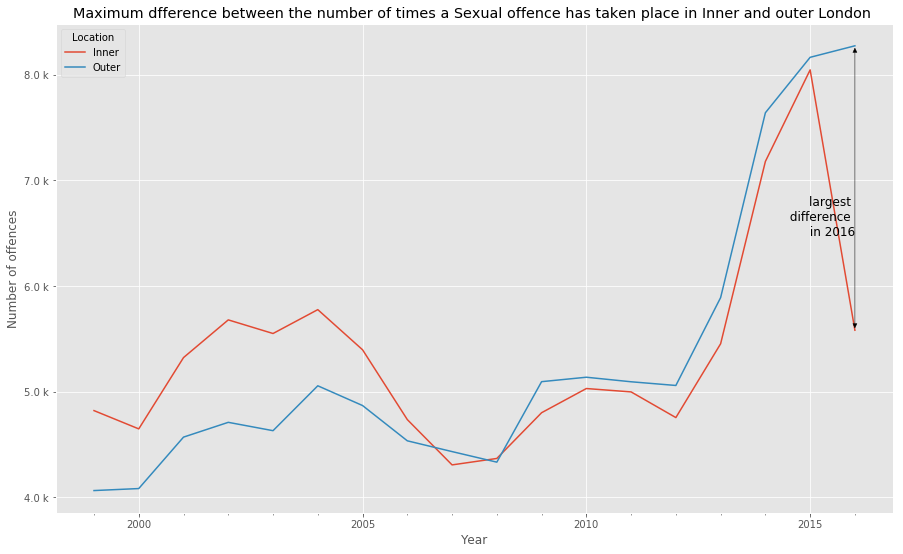

In [56]:
max_offence_year = diff_SOffence.idxmax()
diff_SOffence.loc[max_offence_year]

outer_max = in_out['Sexual Offences'].loc[max_offence_year, 'Outer'] 
inner_max = in_out['Sexual Offences'].loc[max_offence_year, 'Inner']

b = (outer_max - inner_max) / 3 + inner_max
ax = in_out['Sexual Offences'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times a Sexual offence has taken place in Inner and outer London ')

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('20',dpi=300, bbox_inches = 'tight')
plt.show()

### MINIMUM DIFFERENCE



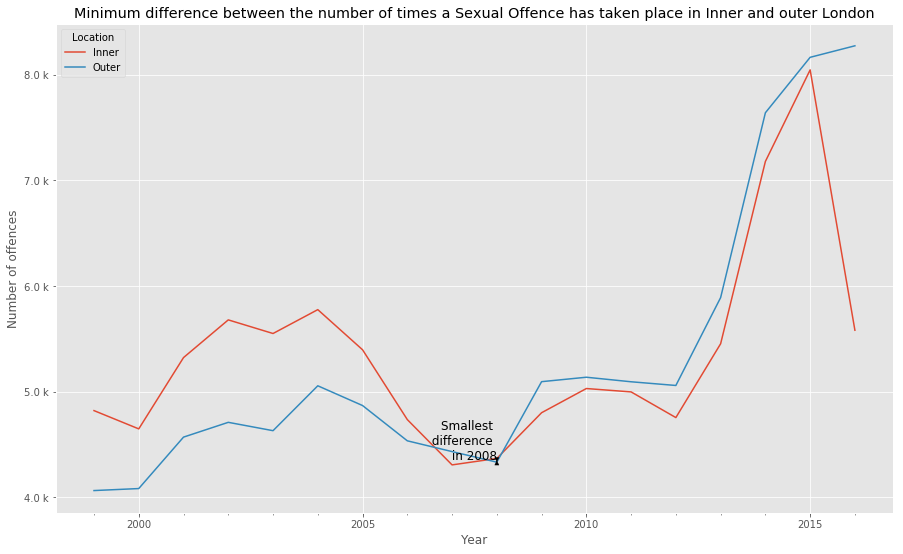

In [57]:
#Find the year in which the difference was smallest.
diff_SOffence = in_out['Sexual Offences']['Outer'] + in_out['Sexual Offences']['Inner']


min_offence_year = diff_SOffence.idxmin()


outer_min = in_out['Sexual Offences'].loc[min_offence_year, 'Outer'] 
inner_min = in_out['Sexual Offences'].loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out['Sexual Offences'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times a Sexual Offence has taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('21',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of  times Violence Against a Person has taken place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [58]:
diff_Violence = in_out['Violence Against the Person']['Outer'] - in_out['Violence Against the Person']['Inner']
print(diff_Violence,'\n', diff_Violence.max(), diff_Violence.min(), diff_Violence.mean())

Year
1999    -4254
2000      336
2001     2117
2002     6049
2003     7445
2004     9392
2005     6417
2006     4767
2007     2585
2008     5736
2009     7958
2010     6300
2011     8767
2012     8211
2013     8980
2014    11284
2015    12362
2016    11036
Freq: A-DEC, dtype: int64 
 12362 -4254 6416.0


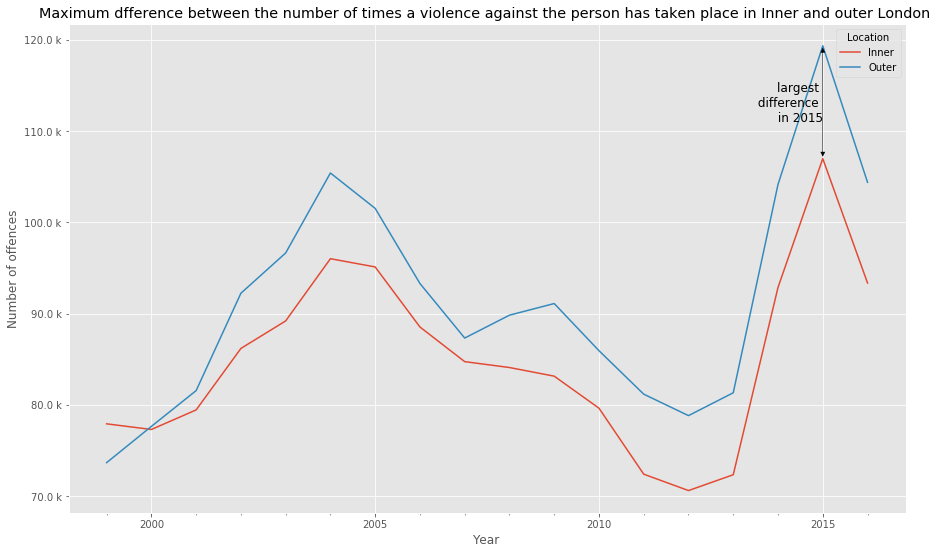

In [59]:
max_offence_year = diff_Violence.idxmax()
diff_Violence.loc[max_offence_year]

outer_max = in_out['Violence Against the Person'].loc[max_offence_year, 'Outer'] 
inner_max = in_out['Violence Against the Person'].loc[max_offence_year, 'Inner']

b = (outer_max - inner_max) / 3 + inner_max
ax = in_out['Violence Against the Person'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times a violence against the person has taken place in Inner and outer London ')

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('22',dpi=300, bbox_inches = 'tight')
plt.show()

## MINIMUM DIFFERENCE

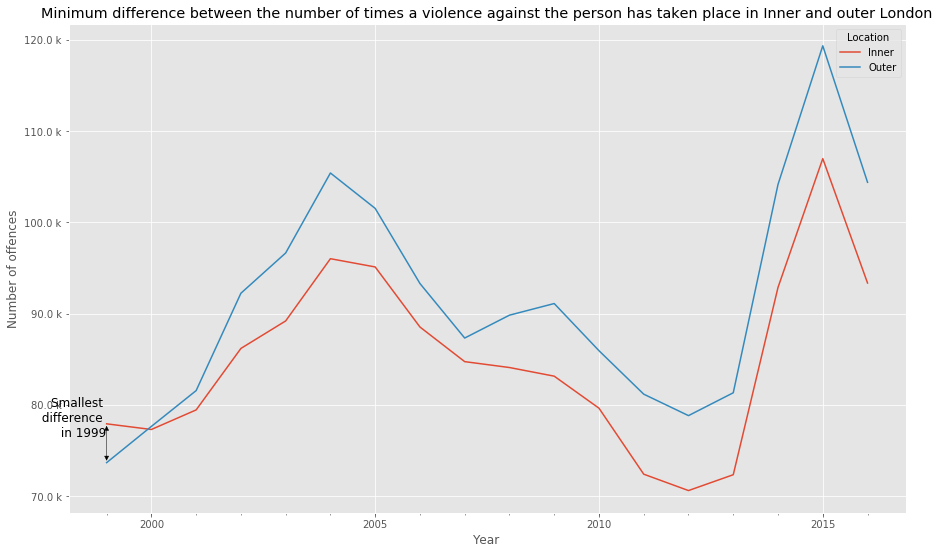

In [60]:
#Find the year in which the difference was smallest.
diff_Violence =  in_out['Violence Against the Person']['Outer'] - in_out['Violence Against the Person']['Inner']

min_offence_year = diff_Violence.idxmin()


outer_min = in_out['Violence Against the Person'].loc[min_offence_year, 'Outer'] 
inner_min = in_out['Violence Against the Person'].loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out['Violence Against the Person'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times a violence against the person has taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('23',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of  times Fraud or Forgery has taken place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [61]:
diff_FnForgery = in_out['Fraud or Forgery']['Outer'] - in_out['Fraud or Forgery']['Inner']
print(diff_FnForgery,'\n', diff_FnForgery.max(), diff_FnForgery.min(), diff_FnForgery.mean())

Year
1999   -3623
2000    -412
2001    3845
2002    8939
2003    9886
2004    3663
2005    7287
2006    6059
2007    3160
2008    5691
2009    6586
2010    6566
2011    6675
2012     228
2013     -13
2014      -3
2015      88
2016      -5
Freq: A-DEC, dtype: int64 
 9886 -3623 3589.8333333333335


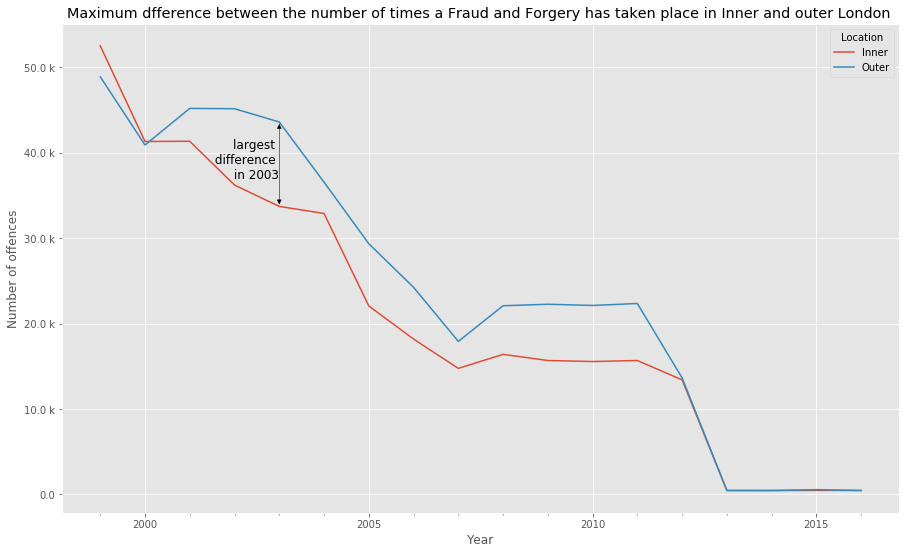

In [62]:
max_offence_year = diff_FnForgery.idxmax()
diff_FnForgery.loc[max_offence_year]

outer_max = in_out['Fraud or Forgery'].loc[max_offence_year, 'Outer'] 
inner_max = in_out['Fraud or Forgery'].loc[max_offence_year, 'Inner']

b = (outer_max - inner_max) / 3 + inner_max
ax = in_out['Fraud or Forgery'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times a Fraud and Forgery has taken place in Inner and outer London ')

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('24',dpi=300, bbox_inches = 'tight')
plt.show()

## MINIMUM DIFFERENCE


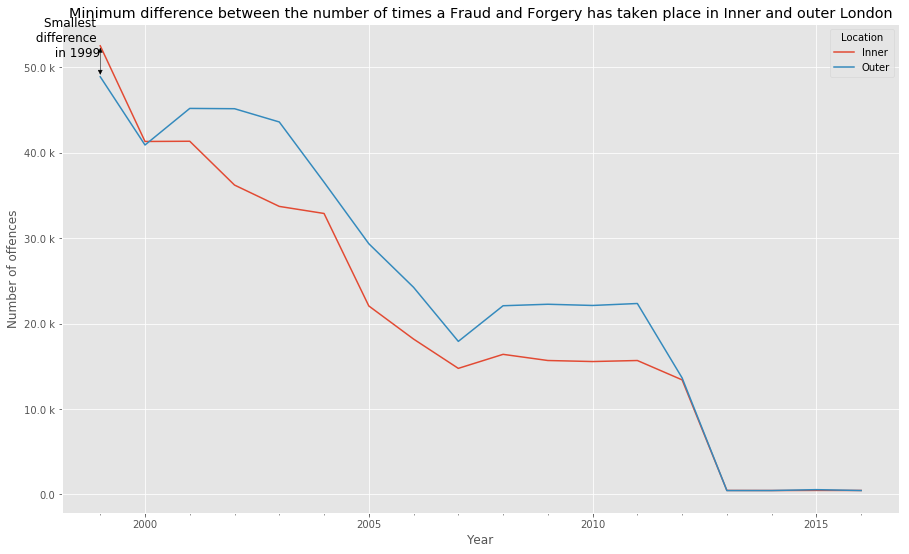

In [63]:
#Find the year in which the difference was smallest.
min_offence_year = diff_FnForgery.idxmin()


outer_min = in_out['Fraud or Forgery'].loc[min_offence_year, 'Outer'] 
inner_min = in_out['Fraud or Forgery'].loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out['Fraud or Forgery'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times a Fraud and Forgery has taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('25',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of times Theft and Handling has taken place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [64]:
diff_TnHandling = -in_out['Theft and Handling']['Outer'] + in_out['Theft and Handling']['Inner']
print(diff_TnHandling,'\n', diff_TnHandling.max(), diff_TnHandling.min(), diff_TnHandling.mean())

Year
1999    62017
2000    66517
2001    77197
2002    77499
2003    68231
2004    56175
2005    43329
2006    43573
2007    41774
2008    30457
2009    34785
2010    37060
2011    47528
2012    47940
2013    37344
2014    30520
2015    32686
2016    27910
Freq: A-DEC, dtype: int64 
 77499 27910 47919.0


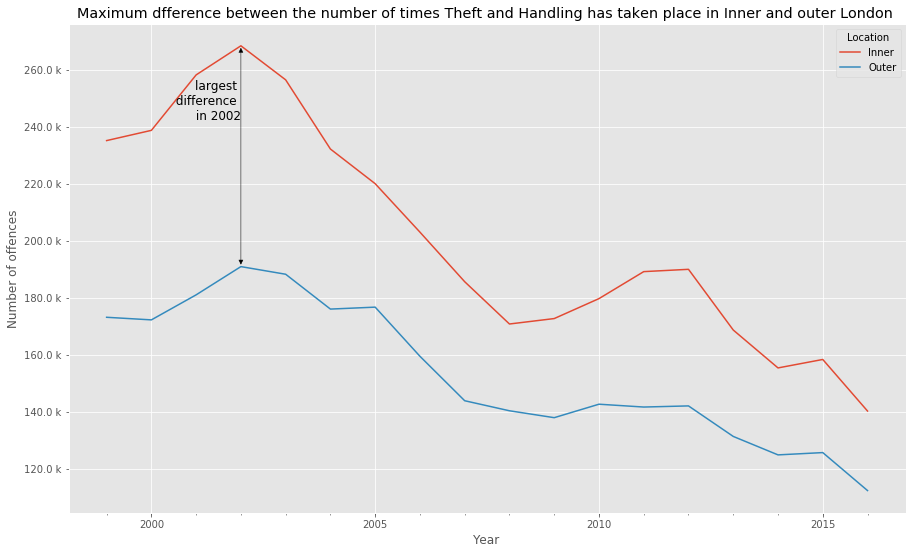

In [65]:
max_offence_year = diff_TnHandling.idxmax()
diff_TnHandling.loc[max_offence_year]

outer_max = in_out['Theft and Handling'].loc[max_offence_year, 'Outer'] 
inner_max = in_out['Theft and Handling'].loc[max_offence_year, 'Inner']

b = (outer_max - inner_max) / 3 + inner_max
ax = in_out['Theft and Handling'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times Theft and Handling has taken place in Inner and outer London ')

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('26',dpi=300, bbox_inches = 'tight')
plt.show()

## MINIMUM DIFFERENCE


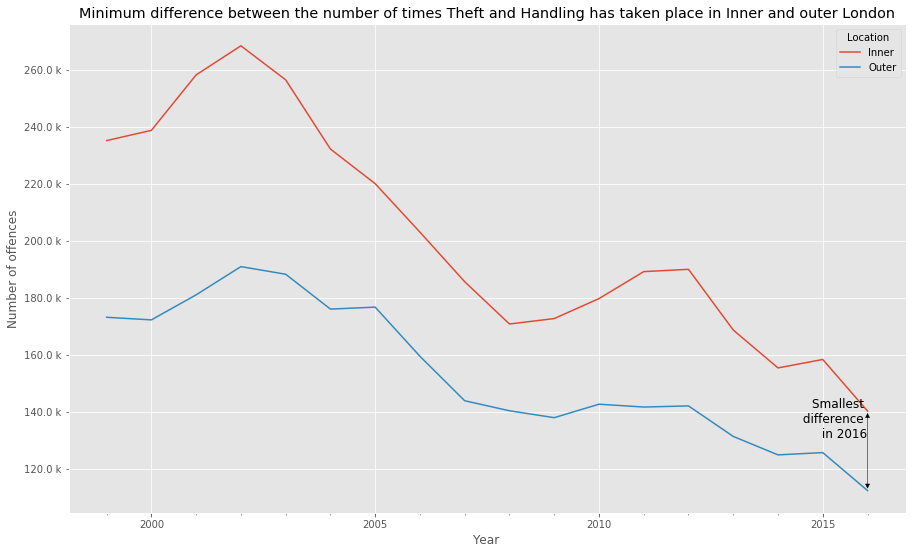

In [66]:
#Find the year in which the difference was smallest.
min_offence_year = diff_TnHandling.idxmin()


outer_min = in_out['Theft and Handling'].loc[min_offence_year, 'Outer'] 
inner_min = in_out['Theft and Handling'].loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out['Theft and Handling'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times Theft and Handling has taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('27',dpi=300, bbox_inches = 'tight')
plt.show()

## Difference between the number of  times Other Notifiable Offences took place in Inner and Outer London
### MAXIMUM DIFFERENCE

In [67]:
diff_Ooffences = -in_out['Other Notifiable Offences']['Outer'] + in_out['Other Notifiable Offences']['Inner']
print(diff_Ooffences,'\n', diff_Ooffences.max(), diff_Ooffences.min(), diff_Ooffences.mean())

Year
1999    1048
2000     758
2001     958
2002    1063
2003    1255
2004     552
2005    1028
2006     889
2007     946
2008     893
2009     441
2010     138
2011    -192
2012     296
2013      77
2014     -66
2015    -550
2016    -596
Freq: A-DEC, dtype: int64 
 1255 -596 496.55555555555554


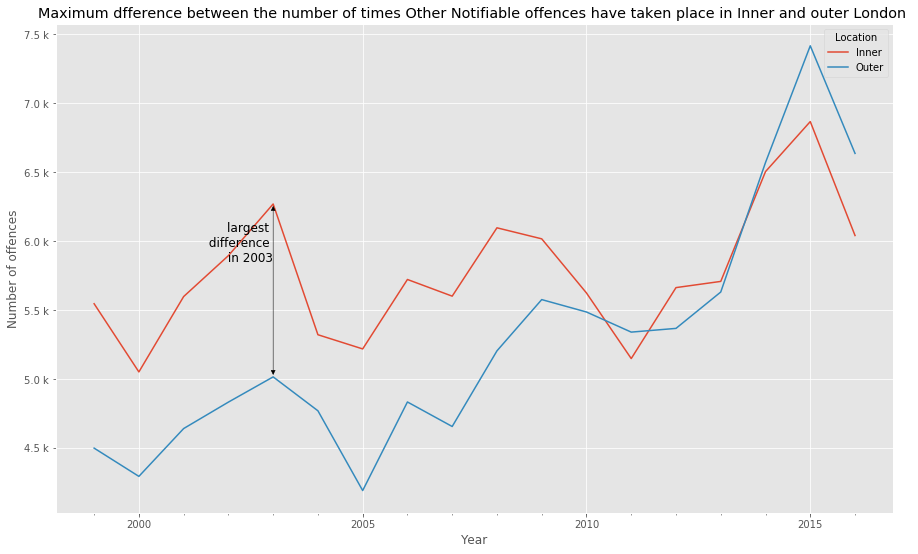

In [68]:
max_offence_year = diff_Ooffences.idxmax()
diff_Ooffences.loc[max_offence_year]

outer_max = in_out['Other Notifiable Offences'].loc[max_offence_year, 'Outer'] 
inner_max = in_out['Other Notifiable Offences'].loc[max_offence_year, 'Inner']

b = (outer_max - inner_max) / 3 + inner_max
ax = in_out['Other Notifiable Offences'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Maximum dfference between the number of times Other Notifiable offences have taken place in Inner and outer London ')

# Add arrow between inner and outer max.
ax.text(max_offence_year ,b, 'largest \n difference \n in {}'.format(max_offence_year.year), horizontalalignment='right',fontsize = 12)


ax.annotate('', xy=(max_offence_year, outer_max),
            xytext=(max_offence_year, inner_max),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('28',dpi=300, bbox_inches = 'tight')
plt.show()

## MINIMUM DIFFERENCE


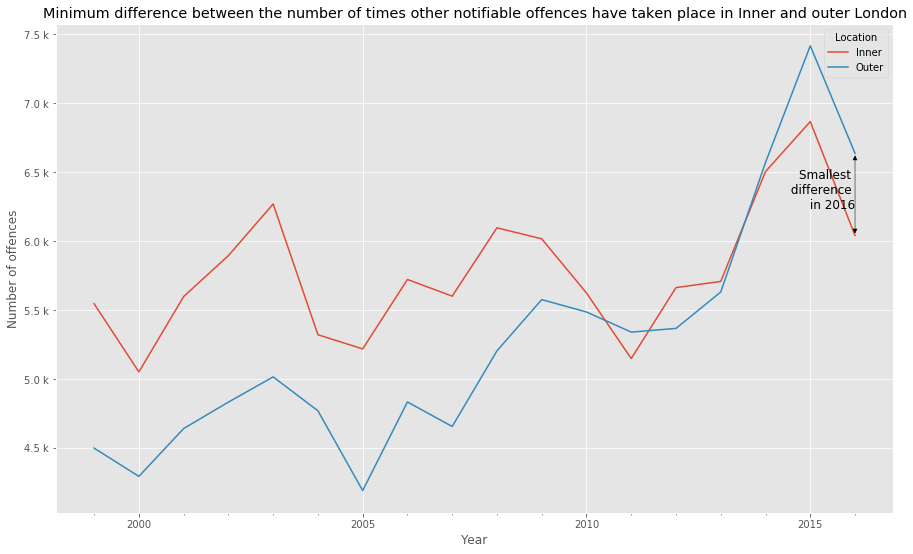

In [69]:
#Find the year in which the difference was smallest.
min_offence_year = diff_Ooffences.idxmin()


outer_min = in_out['Other Notifiable Offences'].loc[min_offence_year, 'Outer'] 
inner_min = in_out['Other Notifiable Offences'].loc[min_offence_year, 'Inner']
b = (outer_min - inner_min) / 3 + inner_min

ax = in_out['Other Notifiable Offences'][['Inner', 'Outer']].plot(figsize =(15,9)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax.set_title('Minimum difference between the number of times other notifiable offences have taken place in Inner and outer London')
ax.text(min_offence_year ,b, 'Smallest \n difference \n in {}'.format(min_offence_year.year), horizontalalignment='right',fontsize = 12)

ax.annotate('', xy=(min_offence_year, outer_min),
            xytext=(min_offence_year, inner_min),
            arrowprops=dict(
                arrowstyle='<|-|>',
                connectionstyle='arc3,rad=0.0',
                edgecolor='black',
                facecolor='black'))
ax.set_ylabel('Number of offences')

plt.savefig('29',dpi=300, bbox_inches = 'tight')
plt.show()

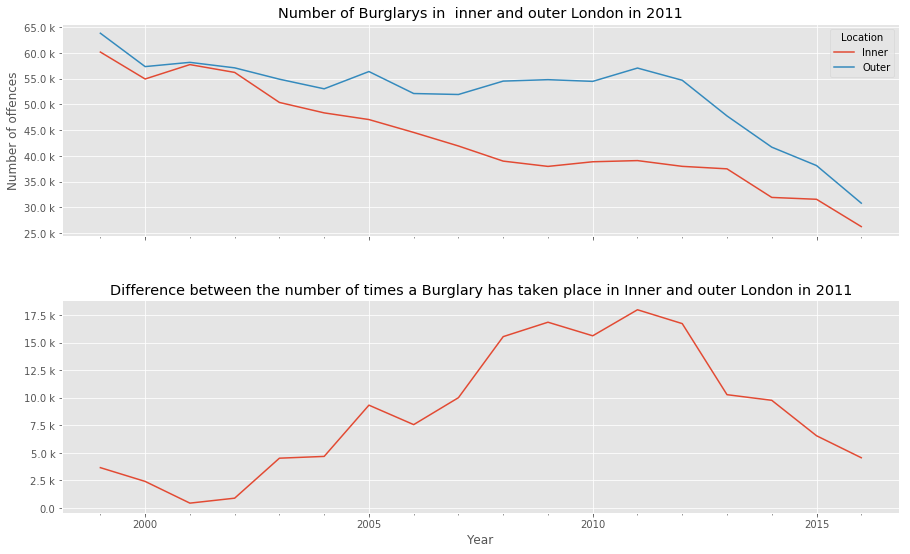

In [70]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(15,9), sharex=True)
# Plot populations on top plot.
in_out.Burglary[['Inner', 'Outer']].plot(ax=ax1) 
ax1.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax1.set_title('Number of Burglarys in  inner and outer London in 2011')
ax1.set_ylabel('Number of offences')
# Plot difference on bottom plot.
diff_Burglary.plot(ax=ax2) 
ax2.yaxis.set_major_formatter(EngFormatter(places=1)) 
ax2.set_title('Difference between the number of times a Burglary has taken place in Inner and outer London in 2011') 
fig.subplots_adjust(hspace=0.3)
plt.savefig('30',dpi=300, bbox_inches = 'tight')

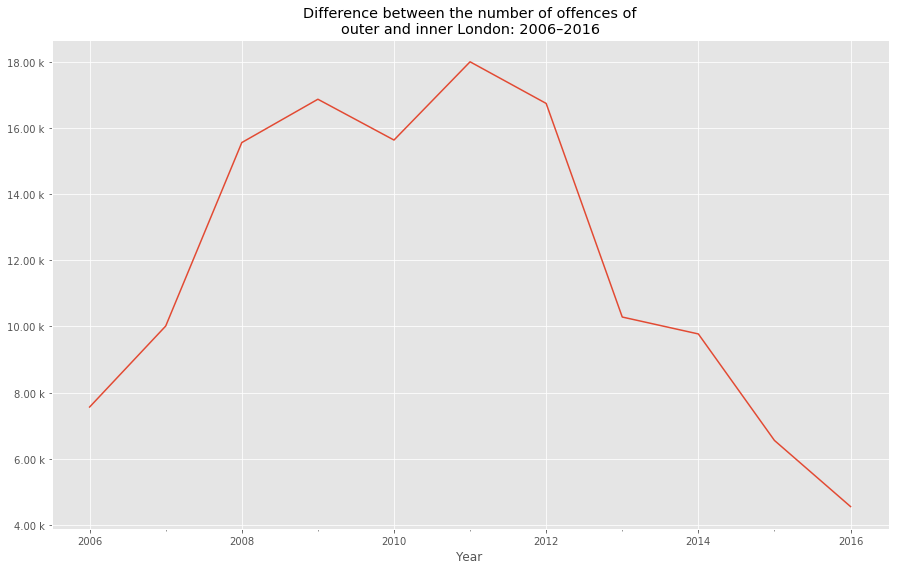

In [71]:
# slice data from 1980 to end (2015).
diff = in_out.Burglary['Outer'] - in_out.Burglary['Inner']
ax = diff.loc['2006':].plot(figsize =(15,9))
ax.set_title('''Difference between the number of offences of
outer and inner London: 2006–2016''')
ax.yaxis.set_major_formatter(EngFormatter(places=2))
plt.savefig('31',dpi=300, bbox_inches = 'tight')

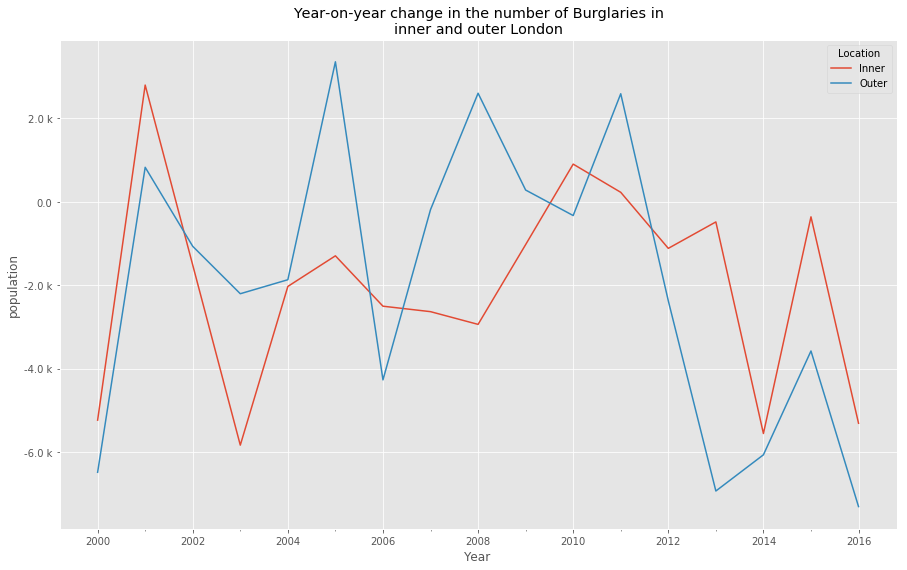

In [161]:
#change in the number of burglaries.
ax = in_out.Burglary[['Inner', 'Outer']].diff().plot(figsize =(15,9))
ax.yaxis.set_major_formatter(EngFormatter(places=1))
ax.set_title('''Year-on-year change in the number of Burglaries occuring in
inner and outer London''')
ax.set_ylabel('population')
plt.savefig('32',dpi=300, bbox_inches = 'tight')
plt.show()

In [73]:
#In order to understand the above plot, refer to the figures below.
print(in_out.Burglary[['Inner', 'Outer']].diff()) #Difference in the number of burglaries that have take place in one year compared to the previous year in inner and outer London.
print('\n'), in_out.Burglary #Total Number of Burglaries that take place every year in outer and inner London


Location   Inner   Outer
Year                    
1999         NaN     NaN
2000     -5238.0 -6488.0
2001      2798.0   826.0
2002     -1519.0 -1069.0
2003     -5837.0 -2206.0
2004     -2031.0 -1870.0
2005     -1297.0  3356.0
2006     -2505.0 -4272.0
2007     -2636.0  -189.0
2008     -2941.0  2602.0
2009     -1028.0   281.0
2010       902.0  -331.0
2011       226.0  2590.0
2012     -1118.0 -2376.0
2013      -484.0 -6937.0
2014     -5558.0 -6069.0
2015      -362.0 -3579.0
2016     -5312.0 -7310.0




(None, Location  Inner  Outer
 Year                  
 1999      60195  63855
 2000      54957  57367
 2001      57755  58193
 2002      56236  57124
 2003      50399  54918
 2004      48368  53048
 2005      47071  56404
 2006      44566  52132
 2007      41930  51943
 2008      38989  54545
 2009      37961  54826
 2010      38863  54495
 2011      39089  57085
 2012      37971  54709
 2013      37487  47772
 2014      31929  41703
 2015      31567  38124
 2016      26255  30814)

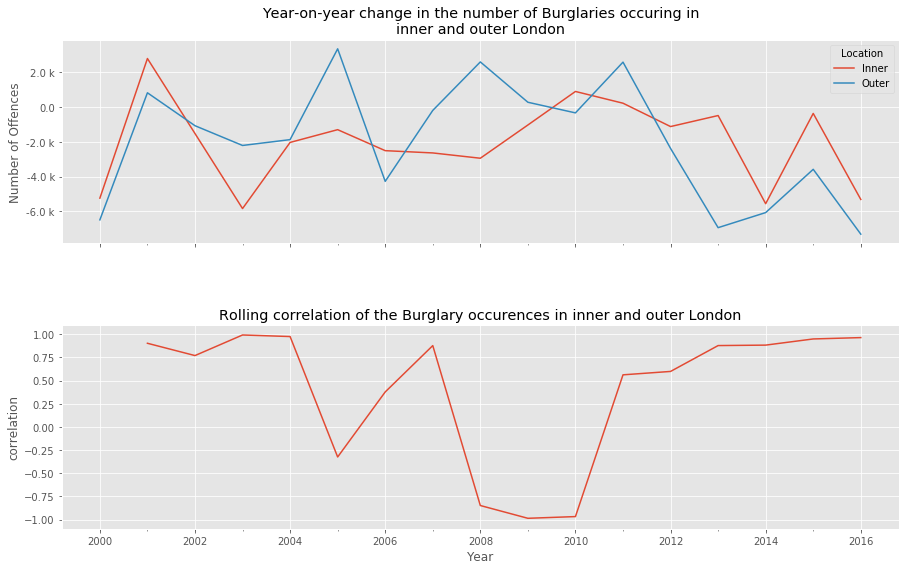

In [164]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize =(15,9), sharex=True)
#Year-on-year change on top plot.
in_out.Burglary[['Inner', 'Outer']].diff().plot(ax=ax1)
ax1.yaxis.set_major_formatter(EngFormatter(places=1))
ax1.set_title('''Year-on-year change in the number of Burglaries occuring in
inner and outer London''')
ax1.set_ylabel('Number of Offences')
#Correlation on bottom plot.
#Create windowed correlation between inner and outer.
c = in_out.Burglary['Inner'].rolling(window=3).corr(in_out.Burglary['Outer'])
#Plot the relationship.
c.plot(ax=ax2)
#Adjust y axis range.
ax2.set_ylim(-1.1, 1.1)
ax2.set_title('''Rolling correlation of the Burglary occurences in inner and outer London''')
ax2.set_ylabel('correlation')
fig.subplots_adjust(hspace=0.4)
plt.savefig('33',dpi=300, bbox_inches = 'tight')

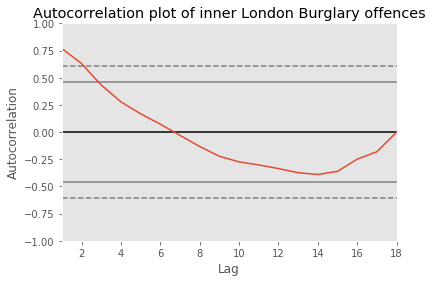

In [75]:
#Testing for randomness in Burglary offences in Inner London: Autocorrelation plot
ax = autocorrelation_plot(in_out.Burglary['Inner'])
ax.set_title('Autocorrelation plot of inner London Burglary offences')
plt.savefig('34',dpi=300, bbox_inches = 'tight')
plt.show()

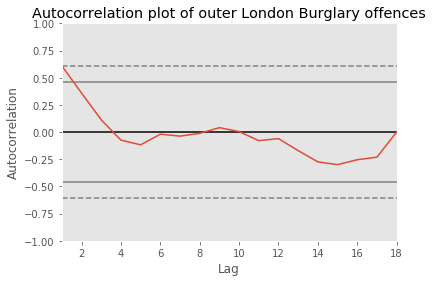

In [76]:
#Testing for randomness in Burglary offences in outer London: Autocorrelation plot
ax = autocorrelation_plot(in_out.Burglary['Outer'])
ax.set_title('Autocorrelation plot of outer London Burglary offences')
plt.savefig('35',dpi=300, bbox_inches = 'tight')
plt.show()

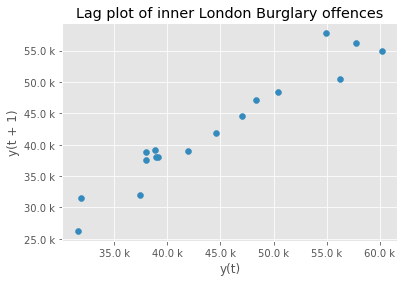

In [165]:
ax = lag_plot(in_out.Burglary['Inner'])
ax.set_title('Lag plot of inner London Burglary offences') 
ax.xaxis.set_major_formatter(EngFormatter(places=1)) 
ax.yaxis.set_major_formatter(EngFormatter(places=1)) 
plt.savefig('36',dpi=300, bbox_inches = 'tight')
plt.show()

In [78]:
pd.pivot_table(df, index= 'Location', values= "Number_of_offences",
               aggfunc= [np.mean, np.median, min, max, np.std])

mean                                                \
Offences     Burglary Criminal Damage        Drugs Fraud or Forgery   
Location                                                              
Inner     3340.119658     3260.893162  2014.688034      1588.760684   
Outer     2745.780702     3127.701754  1044.628655      1275.985380   

                                                                 \
Offences Other Notifiable Offences      Robbery Sexual Offences   
Location                                                          
Inner                   443.987179  1563.995726      412.123932   
Outer                   277.646199   818.953216      279.602339   

                                                          median  \
Offences Theft and Handling Violence Against the Person Burglary   
Location                                                           
Inner          15479.923077                 6537.910256   3308.0   
Outer           8069.473684                 4810.991228   2699.5   

                     ...                                     max          std  \
Offences             ...             Violence Against the Person     Burglary   
Location             ...                                                        
Inner                ...                                   10670  1009.106171   
Outer                ...                                   10084   977.129932   

                                                       \
Offences Criminal Damage       Drugs Fraud or Forgery   
Location                                                
Inner        1344.912624  1116.31343      1442.849393   
Outer        1381.410081   706.94772      1073.034302   

                                                                \
Offences Other Notifiable Offences     Robbery Sexual Offences   
Location                                                         
Inner                   165.509059  796.210038      139.304178   
Outer                   108.907642  530.492233      115.303831   

                                                         
Offences Theft and Handling Violence Against the Person  
Location                                                 
Inner           8480.229656                 1737.995413  
Outer           2686.708296                 1759.074266  

[2 rows x 45 columns]